In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [2]:
# plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})
# plt.rcParams.update({'font.size':20})

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [4]:
import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [5]:
import pandas as pd
import os

In [6]:
import phenom

In [7]:
import lal

In [8]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [9]:
import pycbc.types
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pycbc.waveform.utils

In [10]:
import workflow_utils
import analysis_utils

In [11]:
import gpm_utils

# load data

In [12]:
# data_dict = workflow_utils.load_nr_data()
nr_data = workflow_utils.load_nr_data()

In [13]:
nr_data['times'][0]

-775.0

In [14]:
nr_data['times'][-1]

86.90000000019597

In [15]:
nr_data['df']

name      q     fring     fdamp  duration  t_final  \
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8   
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5   
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7   
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6   
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7   
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6   
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9   
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8   
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1   
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4   
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5   
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1   
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
46                GT0446   2.00  0.083149  0.013774    1378.6    470.3   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
51                GT0577   5.00  0.071862  0.014048    1281.6    574.2   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   
53                GT0604

# load model

In [16]:
# could also call the model GPM: Generative Phenomenological Model?
# PP = load_model_utils.PhenProb(model_dir="model_100123")

gpm = gpm_utils.GPM(
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_26_02_23/components.cpkl',
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_27_02_23/components.cpkl',
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_28_02_23/components.cpkl',
    
    # last collocation = -100
    # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_03_03_23/components.cpkl',
    
    
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_26_02_23/components.cpkl',
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_27_02_23/components.cpkl',
    
     # last collocation = -100
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_03_03_23/components.cpkl',
     # ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_26_02_23/components.cpkl',
     # ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_27_02_23/components.cpkl',
    

     # inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_26_02_23/components.cpkl',
     # merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_26_02_23/components.cpkl',
    
    # last collocation = -100
#      inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_04_03_23/components.cpkl',
#      merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_04_03_23/components.cpkl',
#      ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_26_02_23/components.cpkl',
    
    
    # new as of sept 2023: using new kernel
    # # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_07_09_23/components.cpkl',
    # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_08_09_23/components.cpkl',
    # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_07_09_23/components.cpkl',
    # ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_07_09_23/components.cpkl',
    # # inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_07_09_23/components.cpkl',
    # inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_08_09_23/components.cpkl',
    # merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_07_09_23/components.cpkl',
    # ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_07_09_23/components.cpkl',
    

    #new as of 11 sept 2023: using new noise estimation
    inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_11_09_23/components.cpkl',
    merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_11_09_23/components.cpkl',
    ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_11_09_23/components.cpkl',
    inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_11_09_23/components.cpkl',
    merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_11_09_23/components.cpkl',
    ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_11_09_23/components.cpkl',
    
)

# main function

In [17]:
# compute the match between the mean GPM and NR
# compute the match between the samples GPM and NR
# compute the match between the mean GPM and the samples GPM

In [18]:
# def compare_with_NR(idx, nr_data, GPM_model, n_samples=-1, Mtotal=100, delta_t=1/4096, low_frequency_cutoff=25, t_nr_start=-800):
#     q = nr_data['df']['q'].values[idx]
#     times = nr_data['times']
#     hp_gpm , hc_gpm = GPM_model.generate_pycbc_hp_hc(
#         q=q,
#         times=times,
#         M=Mtotal,
#         delta_t=delta_t,
#         n_samples=n_samples,
#     )
#     hp_nr, hc_nr = analysis_utils.get_nr_strain(
#         q=q,
#         strain=nr_data['strains'][idx],
#         times=nr_data['times'],
#         M=Mtotal,
#         delta_t=delta_t,
#         t_nr_start=t_nr_start,
#     )
    
#     hp1s = []
#     hc1s = []
    
#     for i in range(len(hp_gpm)):
#         hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp_gpm[i], hc_gpm[i], hp_nr, hc_nr, Mtotal)
#         hp1s.append(hp1_)
#         hc1s.append(hc1_)
        
#     # just take last one becase 2nd waveform remains fixed
#     hp2 = hp2_
#     hc2 = hc2_
    
#     matches = [analysis_utils.compute_match(hp1s[i], hp2, low_frequency_cutoff) for i in range(len(hp1s))]
#     matches = np.array(matches)
    
#     return matches, hp1s, hc1s, hp2, hc2

In [19]:
def compare_waveforms(hp1s, hc1s, hp2, hc2, low_frequency_cutoff=25, left_trim_M=200, end_time_M=70, high_frequency_cutoff=None):
    """
    hp1s, hc1s: list of pycbc.TimeSeries
    hp2, hc2: single instance of pycbc.TimeSeries
    
    hp2 and hc2 are left unchanged (in terms of time/phase shifts) but their lengths can change
    """
    hp1s_out = []
    hc1s_out = []
    
    for i in range(len(hp1s)):
        hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp1s[i], hc1s[i], hp2, hc2, Mtotal, left_trim_M=left_trim_M, end_time_M=end_time_M)
        hp1s_out.append(hp1_)
        hc1s_out.append(hc1_)
        
    # just take last one becase 2nd waveform remains fixed
    hp2_out = hp2_
    hc2_out = hc2_
    
    matches = [analysis_utils.compute_match(hp1s_out[i], hp2_out, low_frequency_cutoff, high_frequency_cutoff) for i in range(len(hp1s_out))]
    matches = np.array(matches)
    
    return matches, hp1s_out, hc1s_out, hp2_out, hc2_out

In [20]:
# get list of mass-ratios that have multiple simulations

In [21]:
q_duplicates = np.sort(nr_data['df'].query('has_dup == True')['q'].unique())

In [22]:
q_duplicates

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [23]:
nr_data['df'].query('q==2')

name    q     fring     fdamp  duration  t_final  \
15   SXS_BBH_0169_Res4  2.0  0.083149  0.013774    3458.2    406.7   
16   SXS_BBH_0169_Res5  2.0  0.083149  0.013774    3468.3    406.6   
17   SXS_BBH_0169_Res3  2.0  0.083149  0.013774    3088.2    406.7   
37  RIT-eBBH-1200-n100  2.0  0.083149  0.013774    1637.8    318.1   
46              GT0446  2.0  0.083149  0.013774    1378.6    470.3   

    start_freq_100Msun    set  has_dup                      tag  
15           19.330074  train     True   q2.0_SXS_BBH_0169_Res4  
16           19.329955  train     True   q2.0_SXS_BBH_0169_Res5  
17           19.330978  train     True   q2.0_SXS_BBH_0169_Res3  
37           19.432679  train     True  q2.0_RIT-eBBH-1200-n100  
46           19.420446  train     True              q2.0_GT0446

In [24]:
# q = q_duplicates[0]
q = q_duplicates[1]
# q = q_duplicates[2]
# q = q_duplicates[4]
# q = q_duplicates[5]
# q = q_duplicates[6]
# q = q_duplicates[7]
# q = q_duplicates[8]
# q = q_duplicates[9]
idxs = nr_data['df'].query(f"q == {q}").index

# idx = 7
# idx=33
# idx=34
# q = nr_data['df']['q'].values[idx]
print(f"q = {q}")

times_ = nr_data['times']
nr_strain_0 = nr_data['strains'][idxs[0]]
nr_strain_other = nr_data['strains'][idxs[1:]]
delta_t = 1/4096.
Mtotal = 100
n_samples = 100
t_nr_start = -800

hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=-1,
)

# mass1, mass2 = phenom.m1_m2_M_q(Mtotal, q)
# hp_gpm_bar, hc_gpm_bar = pycbc.waveform.get_td_waveform(
#     mass1=mass1,
#     mass2=mass2,
#     # approximant="NRSur7dq4",
#     # approximant="IMRPhenomD",
#     # approximant="IMRPhenomT",
#     approximant="SEOBNRv4",
#     f_lower=15,
#     delta_t=delta_t,
# )
# hp_gpm_bar = [hp_gpm_bar]
# hc_gpm_bar = [hc_gpm_bar]



hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

hp_nr, hc_nr = analysis_utils.get_nr_strain(
    q=q,
    strain=nr_strain_0,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    t_nr_start=t_nr_start,
)

hp_nr_others = []
hc_nr_others = []
for i in range(len(idxs[1:])):
    hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_other[i],
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )
    hp_nr_others.append(hp_nr_other_)
    hc_nr_others.append(hc_nr_other_)
    

# hp_gpm_bar[0].resize(len(hp_gpm_bar[0])*2)
# hp_gpm_bar[0].roll(len(hp_gpm_bar[0])//4)

# hc_gpm_bar[0].resize(len(hc_gpm_bar[0])*2)
# hc_gpm_bar[0].roll(len(hc_gpm_bar[0])//4)

# hp_nr.resize(len(hp_nr)*2)
# hp_nr.roll(len(hp_nr)//4)

# hc_nr.resize(len(hc_nr)*2)
# hc_nr.roll(len(hc_nr)//4)
  
    
    

# compare the mean model prediction with one of the NR waveforms
matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr)

# compare samples from the model with one of the NR waveforms
matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr)

# compare samples from the model with the mean model prediction
matches_self, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])

# compare the mean model prediction with all the NR waveforms:
matches_nr_other_gpm_bar, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms(hp_nr_others, hc_nr_others, hp_gpm_bar[0], hc_gpm_bar[0])

# compare a reference NR with the other NR simulations at the same mass-ratio:
matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr)

print(matches_bar[0])
print(min(matches))
print(np.median(matches))
print(max(matches))

times = hp1s[0].sample_times
times_M = phenom.StoM(times, Mtotal)

q = 2.0
0.9997606302508191
0.999114961174753
0.9996100062344468
0.999828766886586


In [25]:
print(np.median(matches)-np.min(matches))

0.0004950450596938882


In [26]:
print(np.min(matches))

0.999114961174753


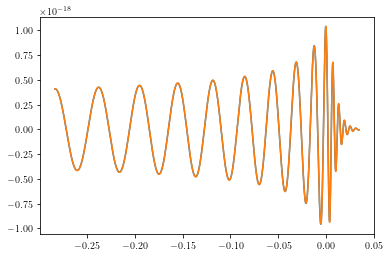

In [27]:
plt.plot(hp1s_bar[0].sample_times, hp1s_bar[0])
plt.plot(hp2.sample_times, hp2)

In [28]:
matches_nr_nr

array([0.99999997, 0.99999919, 0.99992015, 0.99847008])

In [29]:
matches_nr_other_gpm_bar

array([0.99976495, 0.99973772, 0.99959356, 0.99775124])

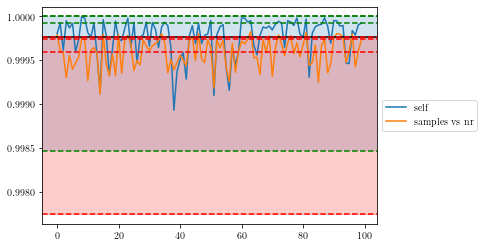

In [30]:
plt.plot(matches_self, label='self');
plt.plot(matches, label='samples vs nr');

plt.axhline(matches_bar[0], c='k')

plt.axhspan(matches_nr_nr.min(), matches_nr_nr.max(), alpha=0.2)
plt.axhspan(matches_nr_other_gpm_bar.min(), matches_nr_other_gpm_bar.max(), alpha=0.2, color='r')

for m_ in matches_nr_nr:
    plt.axhline(m_, c='g', ls='--')

for m_ in matches_nr_other_gpm_bar:
    plt.axhline(m_, c='r', ls='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [31]:
matches.max() - matches.min()

0.0007138057118329932

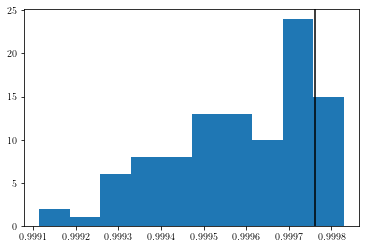

In [32]:
plt.hist(matches);
plt.axvline(matches_bar[0], c='k')

In [33]:
# # y1_bar = hp1s_bar[0].numpy()
# # y1_samples = np.array([hp1s[i].numpy() for i in range(len(hp1s))])
# # y2 = hp2.numpy()


y1_bar = pycbc.waveform.utils.amplitude_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
amp_ts = [pycbc.waveform.utils.amplitude_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
y1_samples = np.array([amp_ts[i].numpy() for i in range(len(hp1s))])
y2 = pycbc.waveform.utils.amplitude_from_polarizations(hp2, hc2).numpy()
times = amp_ts[0].sample_times
times_M = phenom.StoM(times, Mtotal)

# y1_bar = pycbc.waveform.utils.phase_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
# phase_ts = [pycbc.waveform.utils.phase_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
# y1_samples = np.array([phase_ts[i].numpy() for i in range(len(hp1s))])
# y2 = pycbc.waveform.utils.phase_from_polarizations(hp2, hc2).numpy()
# times = phase_ts[0].sample_times
# times_M = phenom.StoM(times, Mtotal)

# y1_bar = pycbc.waveform.utils.frequency_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
# freqs_ts = [pycbc.waveform.utils.frequency_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
# y1_samples = np.array([freqs_ts[i].numpy() for i in range(len(hp1s))])
# y2 = pycbc.waveform.utils.frequency_from_polarizations(hp2, hc2).numpy()
# times = freqs_ts[0].sample_times
# times_M = phenom.StoM(times, Mtotal)


In [34]:
# y1_bar = IUS(times, y1_bar).derivative()(times)
# y1_samples = np.array([IUS(times, y1_sample).derivative()(times) for y1_sample in y1_samples])
# y2 = IUS(times, y2).derivative()(times)

In [35]:
def plot_comparison(times, y1_bar, y1_samples, y2):
    plt.figure(figsize=(14, 4), dpi=100)

    color='deepskyblue'
    # color='C0'
    # color='C1'
    # color='salmon'

    plt.plot(times, y1_bar, label=f'GPM Mean Match', c=color)

    plt.plot(times, y1_samples[0].T, alpha=0.5, label='GPM samples', c=color)
    plt.plot(times, y1_samples[:10].T, alpha=0.5, c=color)
    plt.fill_between(times, y1=y1_samples.min(0), y2=y1_samples.max(0), alpha=0.2, color=color)

    plt.plot(times, y2, ls='-', label='NR', lw=2, c='k')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # plt.title(f"q={nr_data['df']['q'].iloc[idx]}")

    # plt.xlim(-100, 100)
    # plt.xlim(250, 600)
    # plt.ylim(0, 200)
    # plt.yscale('log')

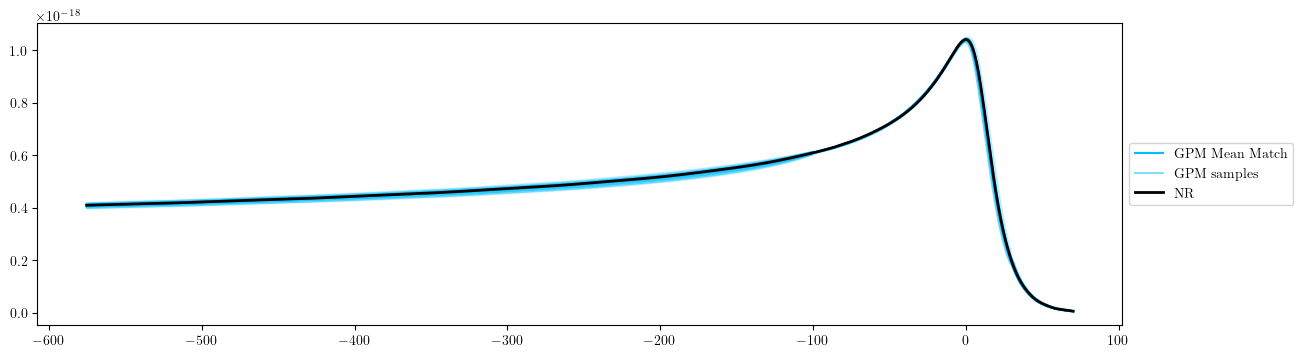

In [36]:
plot_comparison(times_M, y1_bar, y1_samples, y2)

Text(0.5, 1.0, 'q=2.0')

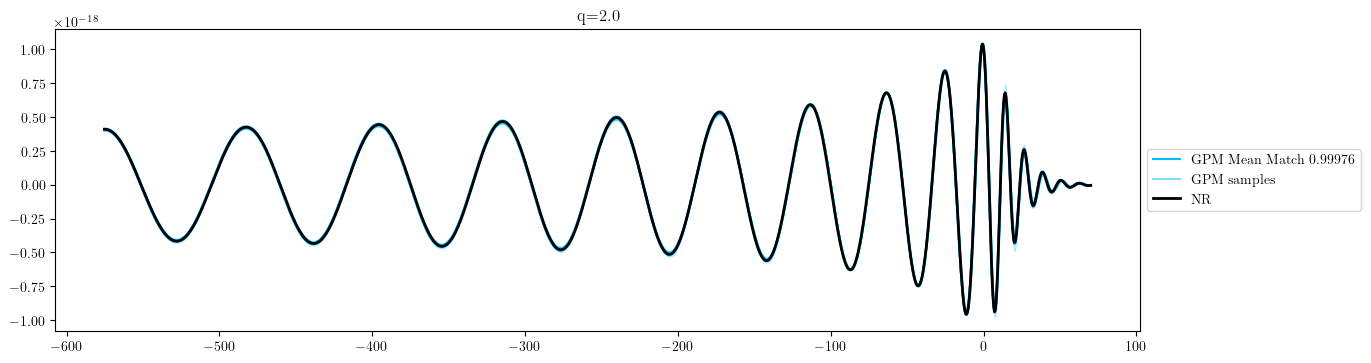

In [37]:
vs = np.array([hp1s[i].numpy() for i in range(len(hp1s))])

times = hp1s[0].sample_times
times_M = phenom.StoM(times, Mtotal)

plt.figure(figsize=(14, 4), dpi=100)

color='deepskyblue'
# color='C0'
# color='C1'
# color='salmon'

plt.plot(times_M, hp1s_bar[0], label=f'GPM Mean Match {matches_bar[0]:.5f}', c=color)

plt.plot(times_M, vs[0].T, alpha=0.5, label='GPM samples', c=color)
plt.plot(times_M, vs[:10].T, alpha=0.5, c=color)
plt.fill_between(times_M, y1=vs.min(0), y2=vs.max(0), alpha=0.2, color=color)

plt.plot(times_M, hp2, ls='-', label='NR', lw=2, c='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f"q={q}")

# plt.xlim(-100, 100)


# self

In [38]:
# q = 32
q = 18
print(q)

# times_ = nr_data['times']
times_ = np.arange(-1000, 100, 0.5)
delta_t = 1/4096.
Mtotal = 100
n_samples = 100

hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=-1,
)

hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

matches_self, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])

18


In [39]:
print(np.min(matches_self))
print(np.median(matches_self))
print(np.max(matches_self))

0.9994205925529625
0.9998580279594487
0.9999917259272504


In [40]:
print(np.median(matches_self)-np.min(matches_self))

0.0004374354064862196


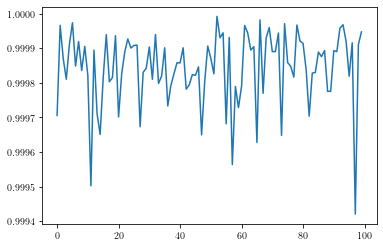

In [41]:
plt.plot(matches_self)

Text(0.5, 1.0, 'q=18 (self comparison)')

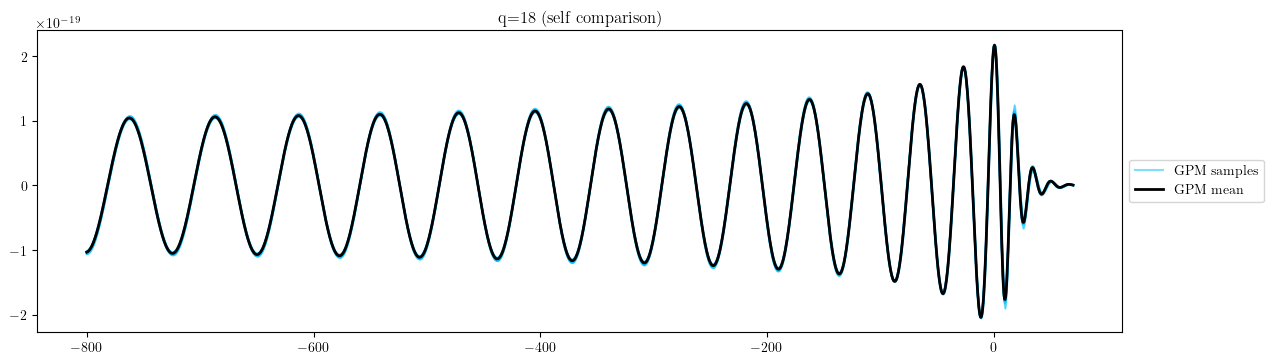

In [42]:
vs = np.array([hp1s_self[i].numpy() for i in range(len(hp1s_self))])

times = hp1s_self[0].sample_times
times_M = phenom.StoM(times, Mtotal)

plt.figure(figsize=(14, 4), dpi=100)

color='deepskyblue'
# color='C0'
# color='C1'
# color='salmon'

# plt.plot(times_M, hp1s_self[0], c=color)

plt.plot(times_M, vs[0].T, alpha=0.5, label='GPM samples', c=color)
plt.plot(times_M, vs[:10].T, alpha=0.5, c=color)

plt.fill_between(times_M, y1=vs.min(0), y2=vs.max(0), alpha=0.5, color=color)

plt.plot(times_M, hp2_self, ls='-', label='GPM mean', lw=2, c='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f"q={q} (self comparison)")

# plt.xlim(-100, 100)

# measures of uncertainty?

In [43]:
# measures of uncertianty?

# is the minimum match of the mean model with samples of itself a good proxy for the true accuracy of the model?
# - no, the distribution is the best

In [44]:
%%time
qs = np.arange(1, 33, 0.25)
# qs = np.arange(1, 33, 1)

# times_ = nr_data['times']
# times_ = np.arange(-1000, 100, 0.5)
times_ = np.arange(-700, 100, 0.5)
delta_t = 1/4096.
Mtotal = 100
# n_samples = 10 # for testing
# n_samples = 100
n_samples = 1000 # 24min

matches_self = []

for i in range(len(qs)):
    q = qs[i]

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=n_samples,
    )

    matches_self_, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])
    matches_self.append(matches_self_)
    
matches_self = np.array(matches_self)

CPU times: user 25min 8s, sys: 15.5 s, total: 25min 24s
Wall time: 25min 26s


In [45]:
matches_self.shape

(128, 1000)

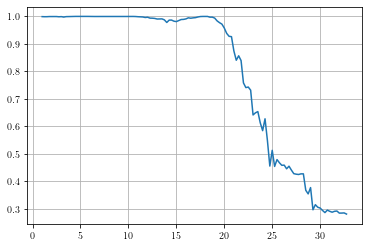

In [46]:
plt.figure()
plt.plot(qs, np.min(matches_self, 1))
plt.grid()

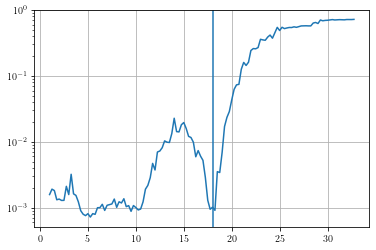

In [47]:
plt.figure()
plt.plot(qs, 1-np.min(matches_self, 1))
plt.grid()
plt.yscale('log')
plt.axvline(18)

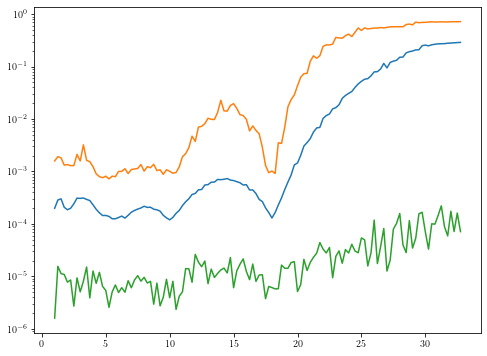

In [48]:
plt.figure(figsize=(8,6))
plt.plot(qs, 1-np.median(matches_self, 1))
plt.plot(qs, 1-np.min(matches_self, 1))
plt.plot(qs, 1-np.max(matches_self, 1))
# plt.grid()
plt.yscale('log')
# plt.axvline(18)

# simplify a bit

## train waveforms - match between GPM mean and NR waveforms

In [49]:
nr_data['df'][['name', 'tag']]

name                        tag
0    q18a0a0c025_96_fine  q18.0_q18a0a0c025_96_fine
1          q4a0_T_96_384         q4.0_q4a0_T_96_384
2    q8a0a0_T_96_504n512   q8.0_q8a0a0_T_96_504n512
3     q8a0a0c05_T_80_420    q8.0_q8a0a0c05_T_80_420
4      q10c25e_T_112_448    q10.0_q10c25e_T_112_448
5          q4a0_T_80_320         q4.0_q4a0_T_80_320
6        q18a0a0c025_144      q18.0_q18a0a0c025_144
7   q8a0a0_T_112_588n768  q8.0_q8a0a0_T_112_588n768
8        q18a0a0c025_120      q18.0_q18a0a0c025_120
9         q4a0_T_112_448        q4.0_q4a0_T_112_448
10     SXS_BBH_0107_Res3     q5.0_SXS_BBH_0107_Res3
11     SXS_BBH_0167_Res5     q4.0_SXS_BBH_0167_Res5
12     SXS_BBH_0107_Res5     q5.0_SXS_BBH_0107_Res5
13     SXS_BBH_0107_Res4     q5.0_SXS_BBH_0107_Res4
14     SXS_BBH_0167_Res3     q4.0_SXS_BBH_0167_Res3
15     SXS_BBH_0169_Res4     q2.0_SXS_BBH_0169_Res4
16     SXS_BBH_0169_Res5     q2.0_SXS_BBH_0169_Res5
17     SXS_BBH_0169_Res3     q2.0_SXS_BBH_0169_Res3
18     SXS_BBH_0180_Res3     q1.0_SXS_BBH_0180_Res3
19     SXS_BBH_0303_Res3    q10.0_SXS_BBH_0303_Res3
20     SXS_BBH_0180_Res2     q1.0_SXS_BBH_0180_Res2
21     SXS_BBH_0303_Res4    q10.0_SXS_BBH_0303_Res4
22     SXS_BBH_0180_Res4     q1.0_SXS_BBH_0180_Res4
23     SXS_BBH_0303_Res5    q10.0_SXS_BBH_0303_Res5
24     RIT-BBH-0416-n140     q7.0_RIT-BBH-0416-n140
25     RIT-BBH-0084-n100    q1.18_RIT-BBH-0084-n100
26     RIT-BBH-0152-n120     q5.0_RIT-BBH-0152-n120
27    RIT-eBBH-1090-n100    q1.0_RIT-eBBH-1090-n100
28    RIT-eBBH-1133-n100    q4.0_RIT-eBBH-1133-n100
29    RIT-eBBH-1241-n100   q1.33_RIT-eBBH-1241-n100
30     RIT-BBH-0942-n120    q15.0_RIT-BBH-0942-n120
31     RIT-BBH-0112-n100     q1.0_RIT-BBH-0112-n100
32     RIT-BBH-0139-n140    q2.41_RIT-BBH-0139-n140
33     RIT-BBH-0373-n140    q15.0_RIT-BBH-0373-n140
34     RIT-BBH-0792-n120    q32.0_RIT-BBH-0792-n120
35     RIT-BBH-0090-n100     q6.0_RIT-BBH-0090-n100
36     RIT-BBH-1020-n144    q1.82_RIT-BBH-1020-n144
37    RIT-eBBH-1200-n100    q2.0_RIT-eBBH-1200-n100
38     RIT-BBH-0978-n144    q10.0_RIT-BBH-0978-n144
39     RIT-BBH-1025-n100    q32.0_RIT-BBH-1025-n100
40                GT0379                q2.2_GT0379
41                GT0378               q2.05_GT0378
42                GT0757               q2.25_GT0757
43                GT0380               q2.35_GT0380
44                GT0454                q4.0_GT0454
45                GT0898                q1.2_GT0898
46                GT0446                q2.0_GT0446
47                GT0453                q3.0_GT0453
48                GT0727               q1.75_GT0727
49                GT0477                q1.5_GT0477
50                GT0738               q1.25_GT0738
51                GT0577                q5.0_GT0577
52                GT0565                q2.5_GT0565
53                GT0604                q6.0_GT0604

In [50]:
qs_train_idxs = nr_data['df'].query("set == 'train'")['q'].index

qs_train = nr_data['df'].query("set == 'train'")['q'].values

qs_train_name = nr_data['df'].query("set == 'train'")['name'].values
qs_train_tag = nr_data['df'].query("set == 'train'")['tag'].values

In [51]:
qs_train_idxs

Int64Index([ 0,  4,  6,  8, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26,
            27, 31, 35, 37, 38, 46, 51, 53],
           dtype='int64')

In [52]:
qs_train

array([18., 10., 18., 18.,  5.,  5.,  5.,  2.,  2.,  2.,  1., 10.,  1.,
       10.,  1., 10.,  5.,  1.,  1.,  6.,  2., 10.,  2.,  5.,  6.])

In [53]:
matches_nr_other_gpm_bar_train=[]
# for q in qs_train:
for idx in qs_train_idxs:

    # idxs = nr_data['df'].query(f"q == {q}").index

    # idx = 7
    # idx=33
    # idx=34
    # q = nr_data['df']['q'].values[idx]
    # print(f"q = {q}")
    print(f"idx = {idx}")
    q = nr_data['df']['q'][idx]

    times_ = nr_data['times']
    # nr_strains = nr_data['strains'][idxs]
    nr_strains = nr_data['strains'][idx]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_nrs, hc_nrs = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strains,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms([hp_nrs], [hc_nrs], hp_gpm_bar[0], hc_gpm_bar[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_train.append(1-matches_nr_other_gpm_bar_[0])


idx = 0
idx = 4
idx = 6
idx = 8
idx = 10
idx = 12
idx = 13
idx = 15
idx = 16
idx = 17
idx = 18
idx = 19
idx = 20
idx = 21
idx = 22
idx = 23
idx = 26
idx = 27
idx = 31
idx = 35
idx = 37
idx = 38
idx = 46
idx = 51
idx = 53


In [54]:
qs_train

array([18., 10., 18., 18.,  5.,  5.,  5.,  2.,  2.,  2.,  1., 10.,  1.,
       10.,  1., 10.,  5.,  1.,  1.,  6.,  2., 10.,  2.,  5.,  6.])

In [55]:
# for each NR simulation in the training data (including duplicates)
# compute the mismatch with GPM_mean
matches_nr_other_gpm_bar_train

[0.0005896748956724096,
 0.00018776993321856228,
 0.0006845439687809263,
 0.0007339095195025847,
 0.00021755482795815517,
 0.00018851934896291223,
 0.00018628086929728394,
 0.0002394099922607973,
 0.00023505341068419394,
 0.00026228172250275517,
 0.0001128204881790662,
 0.0005820532617965002,
 0.00011299047462276501,
 0.0003439739923053464,
 0.00011184124456387057,
 0.0002651088245773092,
 0.00045135971339538283,
 0.00026222584363377877,
 0.000972035794855941,
 0.00032815857230772405,
 0.0004064401713228527,
 0.0002102950249868174,
 0.002248758135628859,
 0.0009527119607600776,
 0.0004289448100114335]

In [56]:
df_train_results_non_agg = pd.DataFrame({'name':qs_train_name, 'tag':qs_train_tag, 'q':qs_train, 'mismatch':matches_nr_other_gpm_bar_train})

In [57]:
df_train_results_non_agg

name                        tag     q  mismatch
0   q18a0a0c025_96_fine  q18.0_q18a0a0c025_96_fine  18.0  0.000590
1     q10c25e_T_112_448    q10.0_q10c25e_T_112_448  10.0  0.000188
2       q18a0a0c025_144      q18.0_q18a0a0c025_144  18.0  0.000685
3       q18a0a0c025_120      q18.0_q18a0a0c025_120  18.0  0.000734
4     SXS_BBH_0107_Res3     q5.0_SXS_BBH_0107_Res3   5.0  0.000218
5     SXS_BBH_0107_Res5     q5.0_SXS_BBH_0107_Res5   5.0  0.000189
6     SXS_BBH_0107_Res4     q5.0_SXS_BBH_0107_Res4   5.0  0.000186
7     SXS_BBH_0169_Res4     q2.0_SXS_BBH_0169_Res4   2.0  0.000239
8     SXS_BBH_0169_Res5     q2.0_SXS_BBH_0169_Res5   2.0  0.000235
9     SXS_BBH_0169_Res3     q2.0_SXS_BBH_0169_Res3   2.0  0.000262
10    SXS_BBH_0180_Res3     q1.0_SXS_BBH_0180_Res3   1.0  0.000113
11    SXS_BBH_0303_Res3    q10.0_SXS_BBH_0303_Res3  10.0  0.000582
12    SXS_BBH_0180_Res2     q1.0_SXS_BBH_0180_Res2   1.0  0.000113
13    SXS_BBH_0303_Res4    q10.0_SXS_BBH_0303_Res4  10.0  0.000344
14    SXS_BBH_0180_Res4     q1.0_SXS_BBH_0180_Res4   1.0  0.000112
15    SXS_BBH_0303_Res5    q10.0_SXS_BBH_0303_Res5  10.0  0.000265
16    RIT-BBH-0152-n120     q5.0_RIT-BBH-0152-n120   5.0  0.000451
17   RIT-eBBH-1090-n100    q1.0_RIT-eBBH-1090-n100   1.0  0.000262
18    RIT-BBH-0112-n100     q1.0_RIT-BBH-0112-n100   1.0  0.000972
19    RIT-BBH-0090-n100     q6.0_RIT-BBH-0090-n100   6.0  0.000328
20   RIT-eBBH-1200-n100    q2.0_RIT-eBBH-1200-n100   2.0  0.000406
21    RIT-BBH-0978-n144    q10.0_RIT-BBH-0978-n144  10.0  0.000210
22               GT0446                q2.0_GT0446   2.0  0.002249
23               GT0577                q5.0_GT0577   5.0  0.000953
24               GT0604                q6.0_GT0604   6.0  0.000429

In [58]:
df_=pd.DataFrame({'q':qs_train, 'mm':matches_nr_other_gpm_bar_train}).groupby(by='q').agg([('min',np.min), ('median',np.median), ('max',np.max)]).sort_index()
df_.columns = df_.columns.droplevel(0)

df_['lower'] = df_['median']-df_['min']
df_['upper'] = df_['max']-df_['median']

train_err_bar_data = df_.reset_index().copy()

In [59]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000112  0.000113  0.000972  0.000001  0.000859
1   2.0  0.000235  0.000262  0.002249  0.000027  0.001986
2   5.0  0.000186  0.000218  0.000953  0.000031  0.000735
3   6.0  0.000328  0.000379  0.000429  0.000050  0.000050
4  10.0  0.000188  0.000265  0.000582  0.000077  0.000317
5  18.0  0.000590  0.000685  0.000734  0.000095  0.000049

q       min    median       max     lower     upper
0   1.0  0.000112  0.000113  0.000972  0.000001  0.000859
1   2.0  0.000235  0.000262  0.002249  0.000027  0.001986
2   5.0  0.000186  0.000218  0.000953  0.000031  0.000735
3   6.0  0.000328  0.000379  0.000429  0.000050  0.000050
4  10.0  0.000188  0.000265  0.000582  0.000077  0.000317
5  18.0  0.000590  0.000685  0.000734  0.000095  0.000049

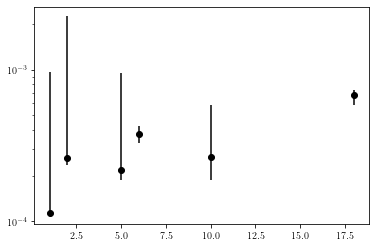

In [60]:


# train_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_train])
# train_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_train])
# train_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_train])
# # plt.errorbar(qs_train, train_median_, yerr=[train_median_-train_min_, train_max_-train_median_], fmt='ok')

# train_err_bar_data = pd.DataFrame({'q':qs_train, 'min':train_min_, 'median':train_median_, 'max':train_max_, 'lower':train_median_-train_min_, 'upper':train_max_-train_median_}).drop_duplicates(subset=['q']).sort_values(by='q')

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='ok')

plt.yscale('log')

train_err_bar_data

## test waveforms - match between GPM mean and NR waveforms

In [61]:
qs_test_idxs = nr_data['df'].query("set == 'test'")['q'].index

qs_test = nr_data['df'].query("set == 'test'")['q'].values

qs_test_name = nr_data['df'].query("set == 'test'")['name'].values
qs_test_tag = nr_data['df'].query("set == 'test'")['tag'].values

In [62]:
qs_test_idxs

Int64Index([ 1,  2,  3,  5,  7,  9, 11, 14, 24, 25, 28, 29, 30, 32, 33, 34, 36,
            39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 52],
           dtype='int64')

In [63]:
qs_test

array([ 4.  ,  8.  ,  8.  ,  4.  ,  8.  ,  4.  ,  4.  ,  4.  ,  7.  ,
        1.18,  4.  ,  1.33, 15.  ,  2.41, 15.  , 32.  ,  1.82, 32.  ,
        2.2 ,  2.05,  2.25,  2.35,  4.  ,  1.2 ,  3.  ,  1.75,  1.5 ,
        1.25,  2.5 ])

In [64]:
matches_nr_other_gpm_bar_test=[]
for idx in qs_test_idxs:

    print(f"idx = {idx}")
    q = nr_data['df']['q'][idx]

    times_ = nr_data['times']
    # nr_strains = nr_data['strains'][idxs]
    nr_strains = nr_data['strains'][idx]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_nrs, hc_nrs = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strains,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms([hp_nrs], [hc_nrs], hp_gpm_bar[0], hc_gpm_bar[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_test.append(1-matches_nr_other_gpm_bar_[0])


idx = 1
idx = 2
idx = 3
idx = 5
idx = 7
idx = 9
idx = 11
idx = 14
idx = 24
idx = 25
idx = 28
idx = 29
idx = 30
idx = 32
idx = 33
idx = 34
idx = 36
idx = 39
idx = 40
idx = 41
idx = 42
idx = 43
idx = 44
idx = 45
idx = 47
idx = 48
idx = 49
idx = 50
idx = 52


In [65]:
matches_nr_other_gpm_bar_test

[0.0018935478725340404,
 0.0001570711532405955,
 0.0006060975242270228,
 0.0017943716104537044,
 6.172152692540678e-05,
 0.0018851248298523693,
 0.0006027754760866699,
 0.0008383331460739551,
 0.00039811541943413076,
 0.00010632865764637067,
 0.0007269872749866568,
 0.0001532371662235077,
 0.00029730165690500243,
 0.0006437574551990677,
 0.00033753926136714796,
 0.1273872818536228,
 0.0002663916456554505,
 0.09737182501073804,
 0.00218834627466169,
 0.0019787677121568814,
 0.0027193605284114852,
 0.0023767448183482642,
 0.0023405563178896527,
 0.0013162656540720574,
 0.003223983976031297,
 0.001658126887814193,
 0.001143403399079701,
 0.0009279056297402111,
 0.0027471286937523764]

In [66]:
df_test_results_non_agg = pd.DataFrame({'name':qs_test_name, 'tag':qs_test_tag, 'q':qs_test, 'mismatch':matches_nr_other_gpm_bar_test})

In [67]:
df_train_results_non_agg.to_csv("/Users/sebastian.khan/Desktop/df_train_results_non_agg.csv", index=False)
df_test_results_non_agg.to_csv("/Users/sebastian.khan/Desktop/df_test_results_non_agg.csv", index=False)

In [68]:
df_test_results_non_agg

name                        tag      q  mismatch
0          q4a0_T_96_384         q4.0_q4a0_T_96_384   4.00  0.001894
1    q8a0a0_T_96_504n512   q8.0_q8a0a0_T_96_504n512   8.00  0.000157
2     q8a0a0c05_T_80_420    q8.0_q8a0a0c05_T_80_420   8.00  0.000606
3          q4a0_T_80_320         q4.0_q4a0_T_80_320   4.00  0.001794
4   q8a0a0_T_112_588n768  q8.0_q8a0a0_T_112_588n768   8.00  0.000062
5         q4a0_T_112_448        q4.0_q4a0_T_112_448   4.00  0.001885
6      SXS_BBH_0167_Res5     q4.0_SXS_BBH_0167_Res5   4.00  0.000603
7      SXS_BBH_0167_Res3     q4.0_SXS_BBH_0167_Res3   4.00  0.000838
8      RIT-BBH-0416-n140     q7.0_RIT-BBH-0416-n140   7.00  0.000398
9      RIT-BBH-0084-n100    q1.18_RIT-BBH-0084-n100   1.18  0.000106
10    RIT-eBBH-1133-n100    q4.0_RIT-eBBH-1133-n100   4.00  0.000727
11    RIT-eBBH-1241-n100   q1.33_RIT-eBBH-1241-n100   1.33  0.000153
12     RIT-BBH-0942-n120    q15.0_RIT-BBH-0942-n120  15.00  0.000297
13     RIT-BBH-0139-n140    q2.41_RIT-BBH-0139-n140   2.41  0.000644
14     RIT-BBH-0373-n140    q15.0_RIT-BBH-0373-n140  15.00  0.000338
15     RIT-BBH-0792-n120    q32.0_RIT-BBH-0792-n120  32.00  0.127387
16     RIT-BBH-1020-n144    q1.82_RIT-BBH-1020-n144   1.82  0.000266
17     RIT-BBH-1025-n100    q32.0_RIT-BBH-1025-n100  32.00  0.097372
18                GT0379                q2.2_GT0379   2.20  0.002188
19                GT0378               q2.05_GT0378   2.05  0.001979
20                GT0757               q2.25_GT0757   2.25  0.002719
21                GT0380               q2.35_GT0380   2.35  0.002377
22                GT0454                q4.0_GT0454   4.00  0.002341
23                GT0898                q1.2_GT0898   1.20  0.001316
24                GT0453                q3.0_GT0453   3.00  0.003224
25                GT0727               q1.75_GT0727   1.75  0.001658
26                GT0477                q1.5_GT0477   1.50  0.001143
27                GT0738               q1.25_GT0738   1.25  0.000928
28                GT0565                q2.5_GT0565   2.50  0.002747

In [69]:
df_=pd.DataFrame({'q':qs_test, 'mm':matches_nr_other_gpm_bar_test}).groupby(by='q').agg([('min',np.min), ('median',np.median), ('max',np.max)]).sort_index()
df_.columns = df_.columns.droplevel(0)

df_['lower'] = df_['median']-df_['min']
df_['upper'] = df_['max']-df_['median']

test_err_bar_data = df_.reset_index().copy()

In [70]:
test_err_bar_data

q       min    median       max     lower     upper
0    1.18  0.000106  0.000106  0.000106  0.000000  0.000000
1    1.20  0.001316  0.001316  0.001316  0.000000  0.000000
2    1.25  0.000928  0.000928  0.000928  0.000000  0.000000
3    1.33  0.000153  0.000153  0.000153  0.000000  0.000000
4    1.50  0.001143  0.001143  0.001143  0.000000  0.000000
5    1.75  0.001658  0.001658  0.001658  0.000000  0.000000
6    1.82  0.000266  0.000266  0.000266  0.000000  0.000000
7    2.05  0.001979  0.001979  0.001979  0.000000  0.000000
8    2.20  0.002188  0.002188  0.002188  0.000000  0.000000
9    2.25  0.002719  0.002719  0.002719  0.000000  0.000000
10   2.35  0.002377  0.002377  0.002377  0.000000  0.000000
11   2.41  0.000644  0.000644  0.000644  0.000000  0.000000
12   2.50  0.002747  0.002747  0.002747  0.000000  0.000000
13   3.00  0.003224  0.003224  0.003224  0.000000  0.000000
14   4.00  0.000603  0.001794  0.002341  0.001192  0.000546
15   7.00  0.000398  0.000398  0.000398  0.000000  0.000000
16   8.00  0.000062  0.000157  0.000606  0.000095  0.000449
17  15.00  0.000297  0.000317  0.000338  0.000020  0.000020
18  32.00  0.097372  0.112380  0.127387  0.015008  0.015008

In [71]:
# test_err_bar_data['max_match'] = 1-test_err_bar_data['max']
# test_err_bar_data.sort_values(by='max_match')

q       min    median       max     lower     upper
0    1.18  0.000106  0.000106  0.000106  0.000000  0.000000
1    1.20  0.001316  0.001316  0.001316  0.000000  0.000000
2    1.25  0.000928  0.000928  0.000928  0.000000  0.000000
3    1.33  0.000153  0.000153  0.000153  0.000000  0.000000
4    1.50  0.001143  0.001143  0.001143  0.000000  0.000000
5    1.75  0.001658  0.001658  0.001658  0.000000  0.000000
6    1.82  0.000266  0.000266  0.000266  0.000000  0.000000
7    2.05  0.001979  0.001979  0.001979  0.000000  0.000000
8    2.20  0.002188  0.002188  0.002188  0.000000  0.000000
9    2.25  0.002719  0.002719  0.002719  0.000000  0.000000
10   2.35  0.002377  0.002377  0.002377  0.000000  0.000000
11   2.41  0.000644  0.000644  0.000644  0.000000  0.000000
12   2.50  0.002747  0.002747  0.002747  0.000000  0.000000
13   3.00  0.003224  0.003224  0.003224  0.000000  0.000000
14   4.00  0.000603  0.001794  0.002341  0.001192  0.000546
15   7.00  0.000398  0.000398  0.000398  0.000000  0.000000
16   8.00  0.000062  0.000157  0.000606  0.000095  0.000449
17  15.00  0.000297  0.000317  0.000338  0.000020  0.000020
18  32.00  0.097372  0.112380  0.127387  0.015008  0.015008

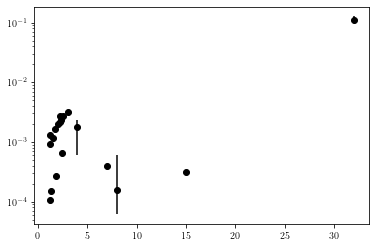

In [72]:


# test_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_test])
# test_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_test])
# test_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_test])
# # plt.errorbar(qs_test, test_median_, yerr=[test_median_-test_min_, test_max_-test_median_], fmt='ok')

# test_err_bar_data = pd.DataFrame({'q':qs_test, 'min':test_min_, 'median':test_median_, 'max':test_max_, 'lower':test_median_-test_min_, 'upper':test_max_-test_median_}).drop_duplicates(subset=['q']).sort_values(by='q')

plt.errorbar(test_err_bar_data['q'], test_err_bar_data['median'], yerr=[test_err_bar_data['lower'], test_err_bar_data['upper']], fmt='ok')

plt.yscale('log')

test_err_bar_data

## NR vs NR (duplicates only)

In [73]:
qs_nr_vs_nr = np.sort(nr_data['df'].query("has_dup == True")['q'].unique())
qs_nr_vs_nr

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [74]:
matches_nr_other_gpm_bar_nr_vs_nr=[]
for q in qs_nr_vs_nr:

    idxs = nr_data['df'].query(f"q == {q}").index

    # idx = 7
    # idx=33
    # idx=34
    # q = nr_data['df']['q'].values[idx]
    print(f"q = {q}")

    times_ = nr_data['times']
    nr_strains = nr_data['strains'][idxs]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_nrs = []
    hc_nrs = []
    for i in range(len(idxs)):
        hp_nrs_, hc_nrs_ = analysis_utils.get_nr_strain(
            q=q,
            strain=nr_strains[i],
            times=times_,
            M=Mtotal,
            delta_t=delta_t,
            t_nr_start=t_nr_start,
        )
        hp_nrs.append(hp_nrs_)
        hc_nrs.append(hc_nrs_)

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms(hp_nrs[1:], hc_nrs[1:], hp_nrs[0], hc_nrs[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_nr_vs_nr.append(1-matches_nr_other_gpm_bar_)


q = 1.0
q = 2.0
q = 4.0
q = 5.0
q = 6.0
q = 8.0
q = 10.0
q = 15.0
q = 18.0
q = 32.0


In [75]:
matches_nr_other_gpm_bar_nr_vs_nr

[array([2.49134924e-09, 1.28859935e-08, 9.33942425e-05, 8.06545340e-04]),
 array([3.16873311e-08, 8.08175825e-07, 7.98467732e-05, 1.52992487e-03]),
 array([6.07432161e-06, 1.12356546e-06, 5.07200604e-04, 4.88931481e-04,
        8.51624203e-04, 1.40056238e-04]),
 array([2.37713792e-05, 5.24270868e-05, 3.05765317e-04, 7.41255375e-04]),
 array([0.00104681]),
 array([0.00035137, 0.00018451]),
 array([6.36926130e-04, 3.83084773e-04, 2.61787449e-04, 3.19599684e-05]),
 array([3.18988018e-05]),
 array([6.72513862e-05, 3.68968220e-05]),
 array([0.00332761])]

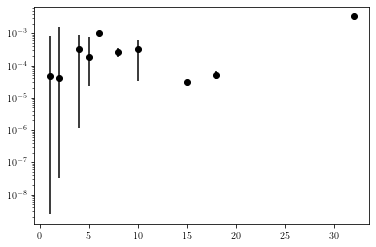

In [76]:


nr_vs_nr_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_nr_vs_nr])
nr_vs_nr_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_nr_vs_nr])
nr_vs_nr_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_nr_vs_nr])
plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok')
plt.yscale('log')

## plot

In [77]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000112  0.000113  0.000972  0.000001  0.000859
1   2.0  0.000235  0.000262  0.002249  0.000027  0.001986
2   5.0  0.000186  0.000218  0.000953  0.000031  0.000735
3   6.0  0.000328  0.000379  0.000429  0.000050  0.000050
4  10.0  0.000188  0.000265  0.000582  0.000077  0.000317
5  18.0  0.000590  0.000685  0.000734  0.000095  0.000049

In [78]:
test_err_bar_data

q       min    median       max     lower     upper
0    1.18  0.000106  0.000106  0.000106  0.000000  0.000000
1    1.20  0.001316  0.001316  0.001316  0.000000  0.000000
2    1.25  0.000928  0.000928  0.000928  0.000000  0.000000
3    1.33  0.000153  0.000153  0.000153  0.000000  0.000000
4    1.50  0.001143  0.001143  0.001143  0.000000  0.000000
5    1.75  0.001658  0.001658  0.001658  0.000000  0.000000
6    1.82  0.000266  0.000266  0.000266  0.000000  0.000000
7    2.05  0.001979  0.001979  0.001979  0.000000  0.000000
8    2.20  0.002188  0.002188  0.002188  0.000000  0.000000
9    2.25  0.002719  0.002719  0.002719  0.000000  0.000000
10   2.35  0.002377  0.002377  0.002377  0.000000  0.000000
11   2.41  0.000644  0.000644  0.000644  0.000000  0.000000
12   2.50  0.002747  0.002747  0.002747  0.000000  0.000000
13   3.00  0.003224  0.003224  0.003224  0.000000  0.000000
14   4.00  0.000603  0.001794  0.002341  0.001192  0.000546
15   7.00  0.000398  0.000398  0.000398  0.000000  0.000000
16   8.00  0.000062  0.000157  0.000606  0.000095  0.000449
17  15.00  0.000297  0.000317  0.000338  0.000020  0.000020
18  32.00  0.097372  0.112380  0.127387  0.015008  0.015008

In [79]:
train_err_bar_data.to_csv("/Users/sebastian.khan/Desktop/train-match.csv", index=False)

In [80]:
test_err_bar_data.to_csv("/Users/sebastian.khan/Desktop/test-match.csv", index=False)

In [82]:
###
#
# output data to make plots
#
###


# nr error
# plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok', label="NR Error", alpha=0.5, mfc='none')
df_nr_error = pd.DataFrame({'x':qs_nr_vs_nr, 'y':nr_vs_nr_median_, 'yerr_low':nr_vs_nr_median_-nr_vs_nr_min_, 'yerr_high':nr_vs_nr_max_-nr_vs_nr_median_})

# test set
# no error bars
mask_ = test_err_bar_data['lower'] > 0
# plt.plot(test_err_bar_data[~mask_]['q'], test_err_bar_data[~mask_]['median'], 'oC1', markeredgewidth=2, markersize=3)
df_test_set_no_error_bars = pd.DataFrame({'x':test_err_bar_data[~mask_]['q'], 'y':test_err_bar_data[~mask_]['median']})
# error bars
# plt.errorbar(test_err_bar_data[mask_]['q'], test_err_bar_data[mask_]['median'], yerr=[test_err_bar_data[mask_]['lower'], test_err_bar_data[mask_]['upper']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
df_test_set_error_bars = pd.DataFrame({'x':test_err_bar_data[mask_]['q'], 'y':test_err_bar_data[mask_]['median'], 'yerr_low':test_err_bar_data[mask_]['lower'], 'yerr_high':test_err_bar_data[mask_]['upper']})

# train set
# error bars
# plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
df_train_set_error_bars = pd.DataFrame({'x':train_err_bar_data['q'], 'y':train_err_bar_data['median'], 'yerr_low':train_err_bar_data['lower'], 'yerr_high':train_err_bar_data['upper']})

# predicted mismatch (median)
# plt.plot(qs, 1-np.percentile(matches_self, 50, 1), color='C2', ls='-', label='Predicted Mismatch (median)')
df_predicted_mismatch = pd.DataFrame(
    {
        'x':qs, 'y':1-np.percentile(matches_self, 50, 1)
    }
)

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
y1=1-np.percentile(matches_self, p1, 1)
y2=1-np.percentile(matches_self, p2, 1)
df_predicted_mismatch['y1_99']=y1
df_predicted_mismatch['y2_99']=y2

w=90
p1=(100-w)/2
p2=100 - (100-w)/2
y1=1-np.percentile(matches_self, p1, 1)
y2=1-np.percentile(matches_self, p2, 1)
df_predicted_mismatch['y1_90']=y1
df_predicted_mismatch['y2_90']=y2

w=50
p1=(100-w)/2
p2=100 - (100-w)/2
y1=1-np.percentile(matches_self, p1, 1)
y2=1-np.percentile(matches_self, p2, 1)
df_predicted_mismatch['y1_50']=y1
df_predicted_mismatch['y2_50']=y2





df_nr_error.to_csv("/Users/sebastian.khan/Desktop/df_nr_error.csv", index=False)
df_test_set_no_error_bars.to_csv("/Users/sebastian.khan/Desktop/df_test_set_no_error_bars.csv", index=False)
df_test_set_error_bars.to_csv("/Users/sebastian.khan/Desktop/df_test_set_error_bars.csv", index=False)
df_train_set_error_bars.to_csv("/Users/sebastian.khan/Desktop/df_train_set_error_bars.csv", index=False)
df_predicted_mismatch.to_csv("/Users/sebastian.khan/Desktop/df_predicted_mismatch.csv", index=False)


99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0


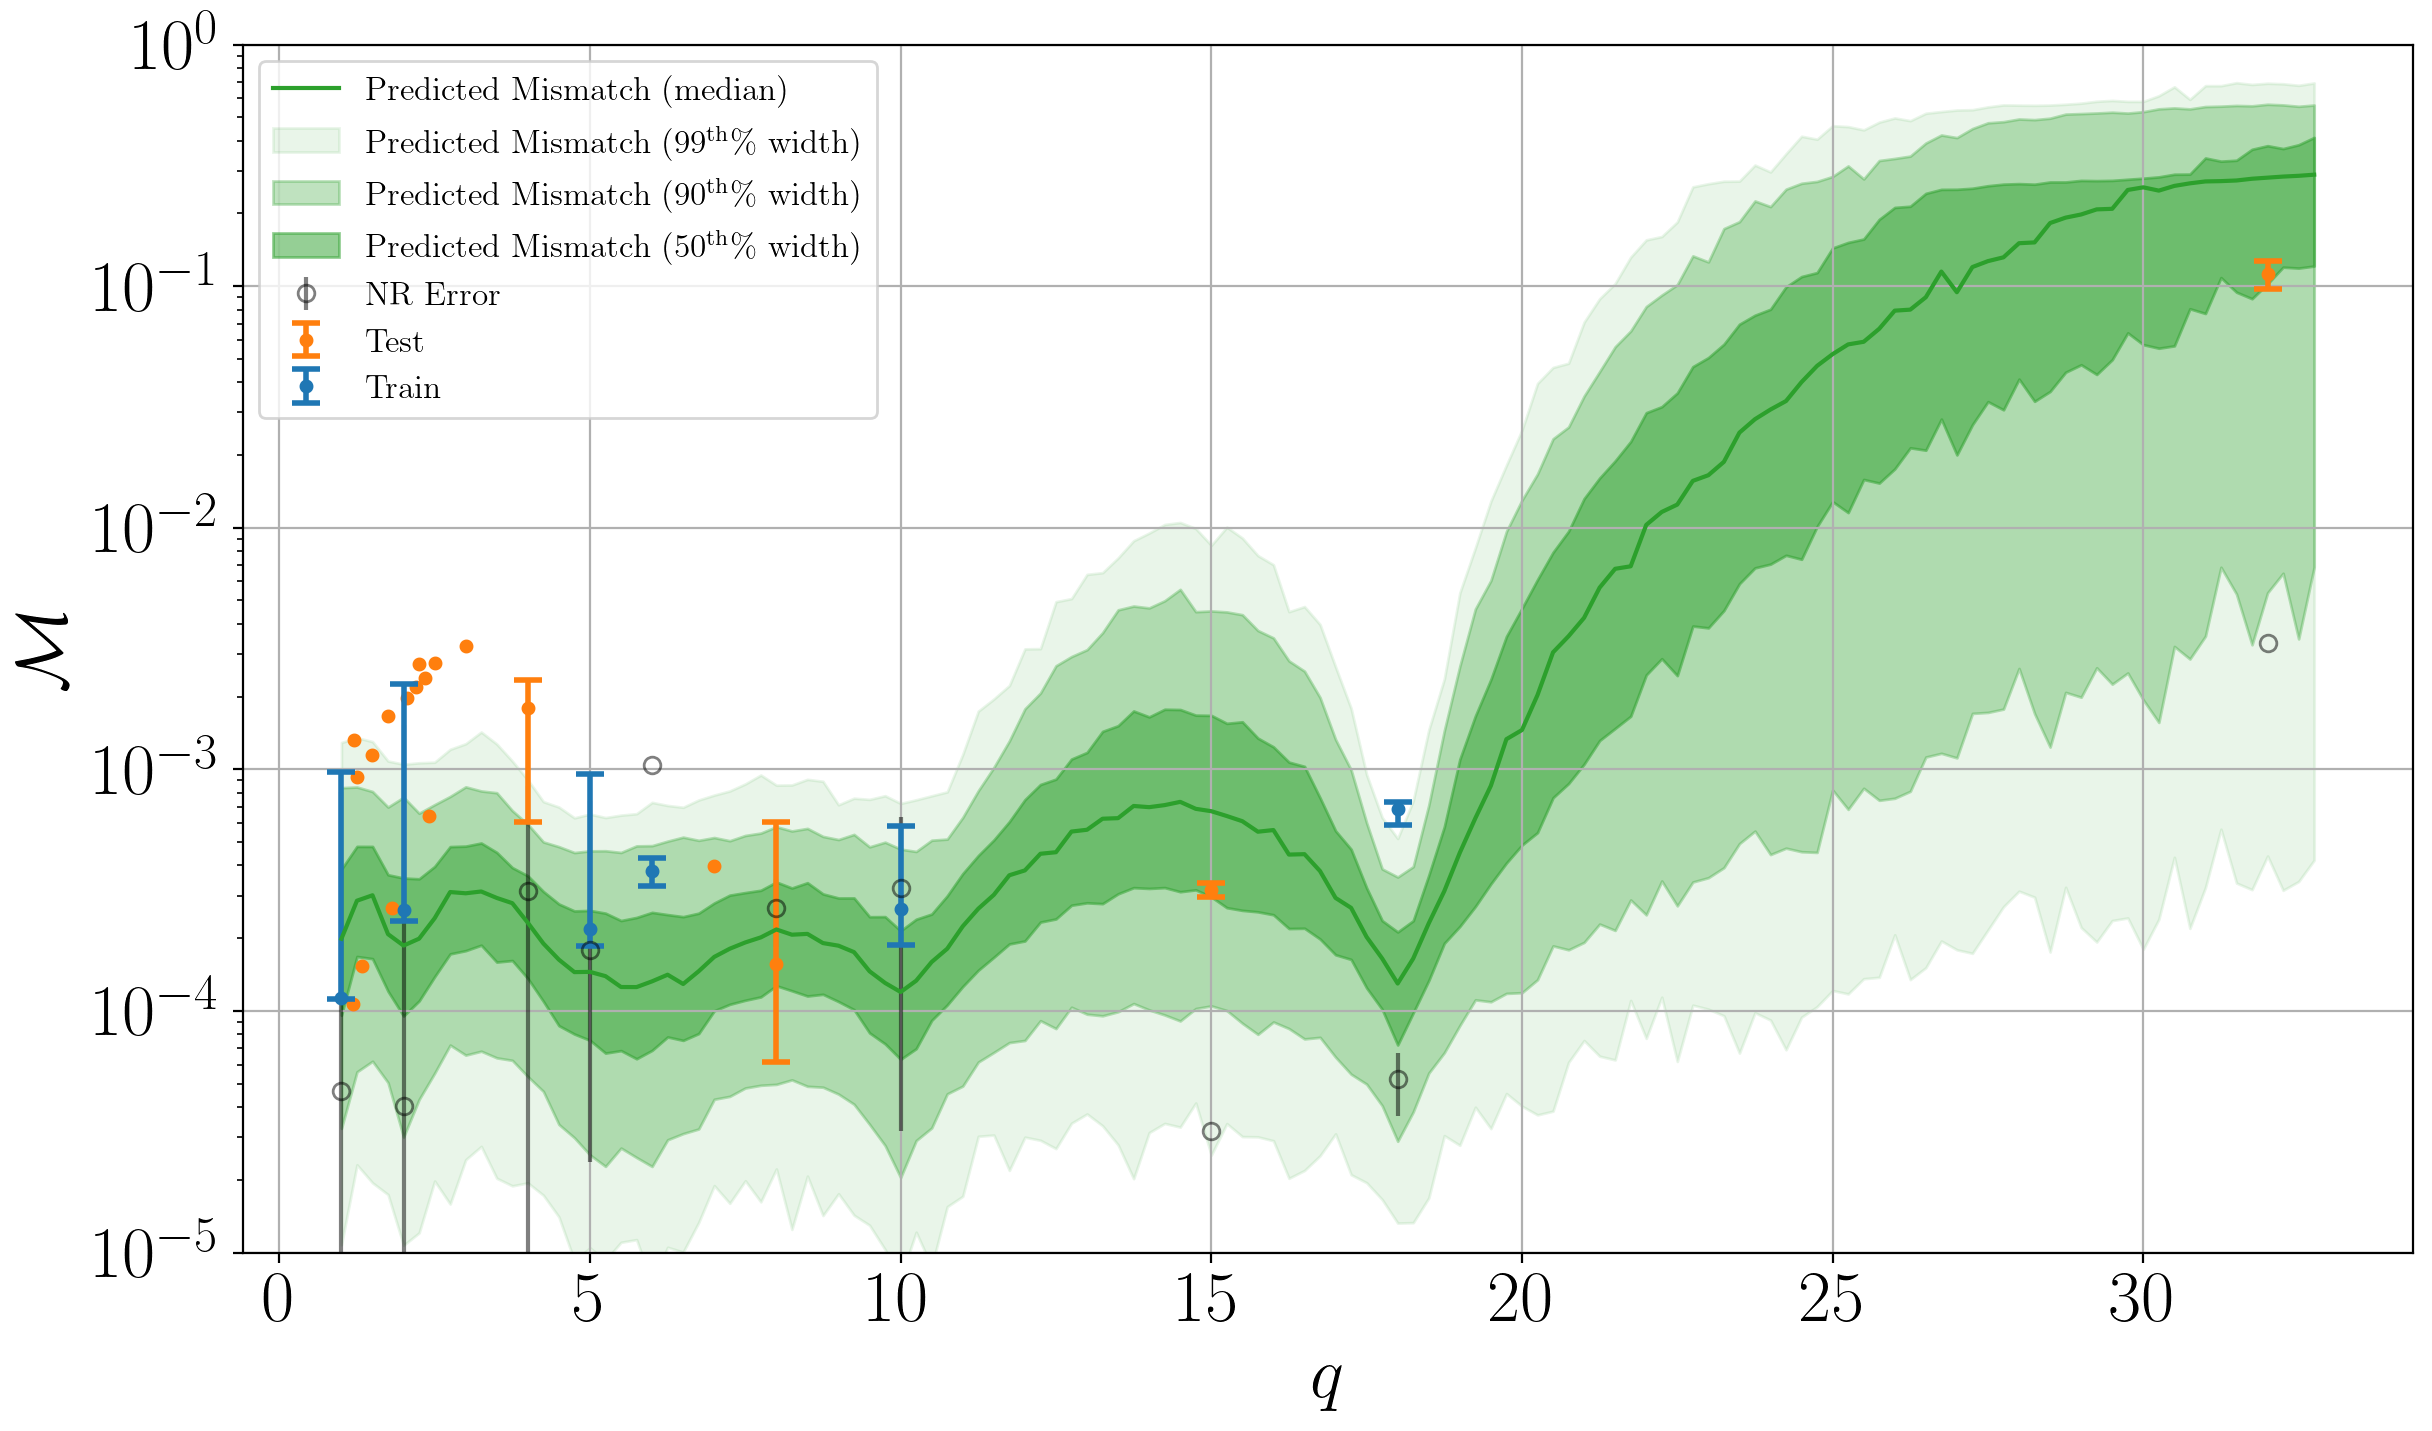

In [83]:
plt.rcParams.update({'font.size':26})
plt.figure(figsize=(14, 8), dpi=200)


plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok', label="NR Error", alpha=0.5, mfc='none')

# split up the test data because
# only some of them have error bars
mask_ = test_err_bar_data['lower'] > 0
plt.plot(test_err_bar_data[~mask_]['q'], test_err_bar_data[~mask_]['median'], 'oC1', markeredgewidth=2, markersize=3)
plt.errorbar(test_err_bar_data[mask_]['q'], test_err_bar_data[mask_]['median'], yerr=[test_err_bar_data[mask_]['lower'], test_err_bar_data[mask_]['upper']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)


####
plt.plot(qs, 1-np.percentile(matches_self, 50, 1), color='C2', ls='-', label='Predicted Mismatch (median)')
# plt.plot(qs, 1-np.percentile(matches_self, 99, 1), color='C2', ls=':', label='Predicted Mismatch (1\%)')

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.1, label=r'Predicted Mismatch ($99^{\rm{th}}\%$ width)')
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.3, label=r'Predicted Mismatch ($90^{\rm{th}}\%$ width)')
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.5, label=r'Predicted Mismatch ($50^{\rm{th}}\%$ width)')





plt.yscale('log')
# plt.xscale('log')
# plt.title("Mismatch between NR and GPM Mean")
plt.legend(loc='upper left', ncol=1, fontsize=12)
plt.xlabel(r"$q$")
plt.ylabel(r"$\mathcal{M}$")
plt.ylim(1e-5, 1e0)
# plt.grid(lw=0.5, c='k')
plt.grid()

####

###
# ax1 = plt.gca()
# xlabels_ = np.sort(np.concatenate((df_cal_data_train['q'], df_cal_data_test['q'][df_cal_data_test['q']>=3])))
# xlabels_ = np.array(xlabels_, dtype=int)
# ax1.set_xticks(xlabels_, xlabels_);

###




# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/mismatch.png", bbox_inches='tight')

In [86]:
train_err_bar_data['q']

0     1.0
1     2.0
2     5.0
3     6.0
4    10.0
5    18.0
Name: q, dtype: float64

In [88]:
test_err_bar_data['q']

0      1.18
1      1.20
2      1.25
3      1.33
4      1.50
5      1.75
6      1.82
7      2.05
8      2.20
9      2.25
10     2.35
11     2.41
12     2.50
13     3.00
14     4.00
15     7.00
16     8.00
17    15.00
18    32.00
Name: q, dtype: float64

99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0


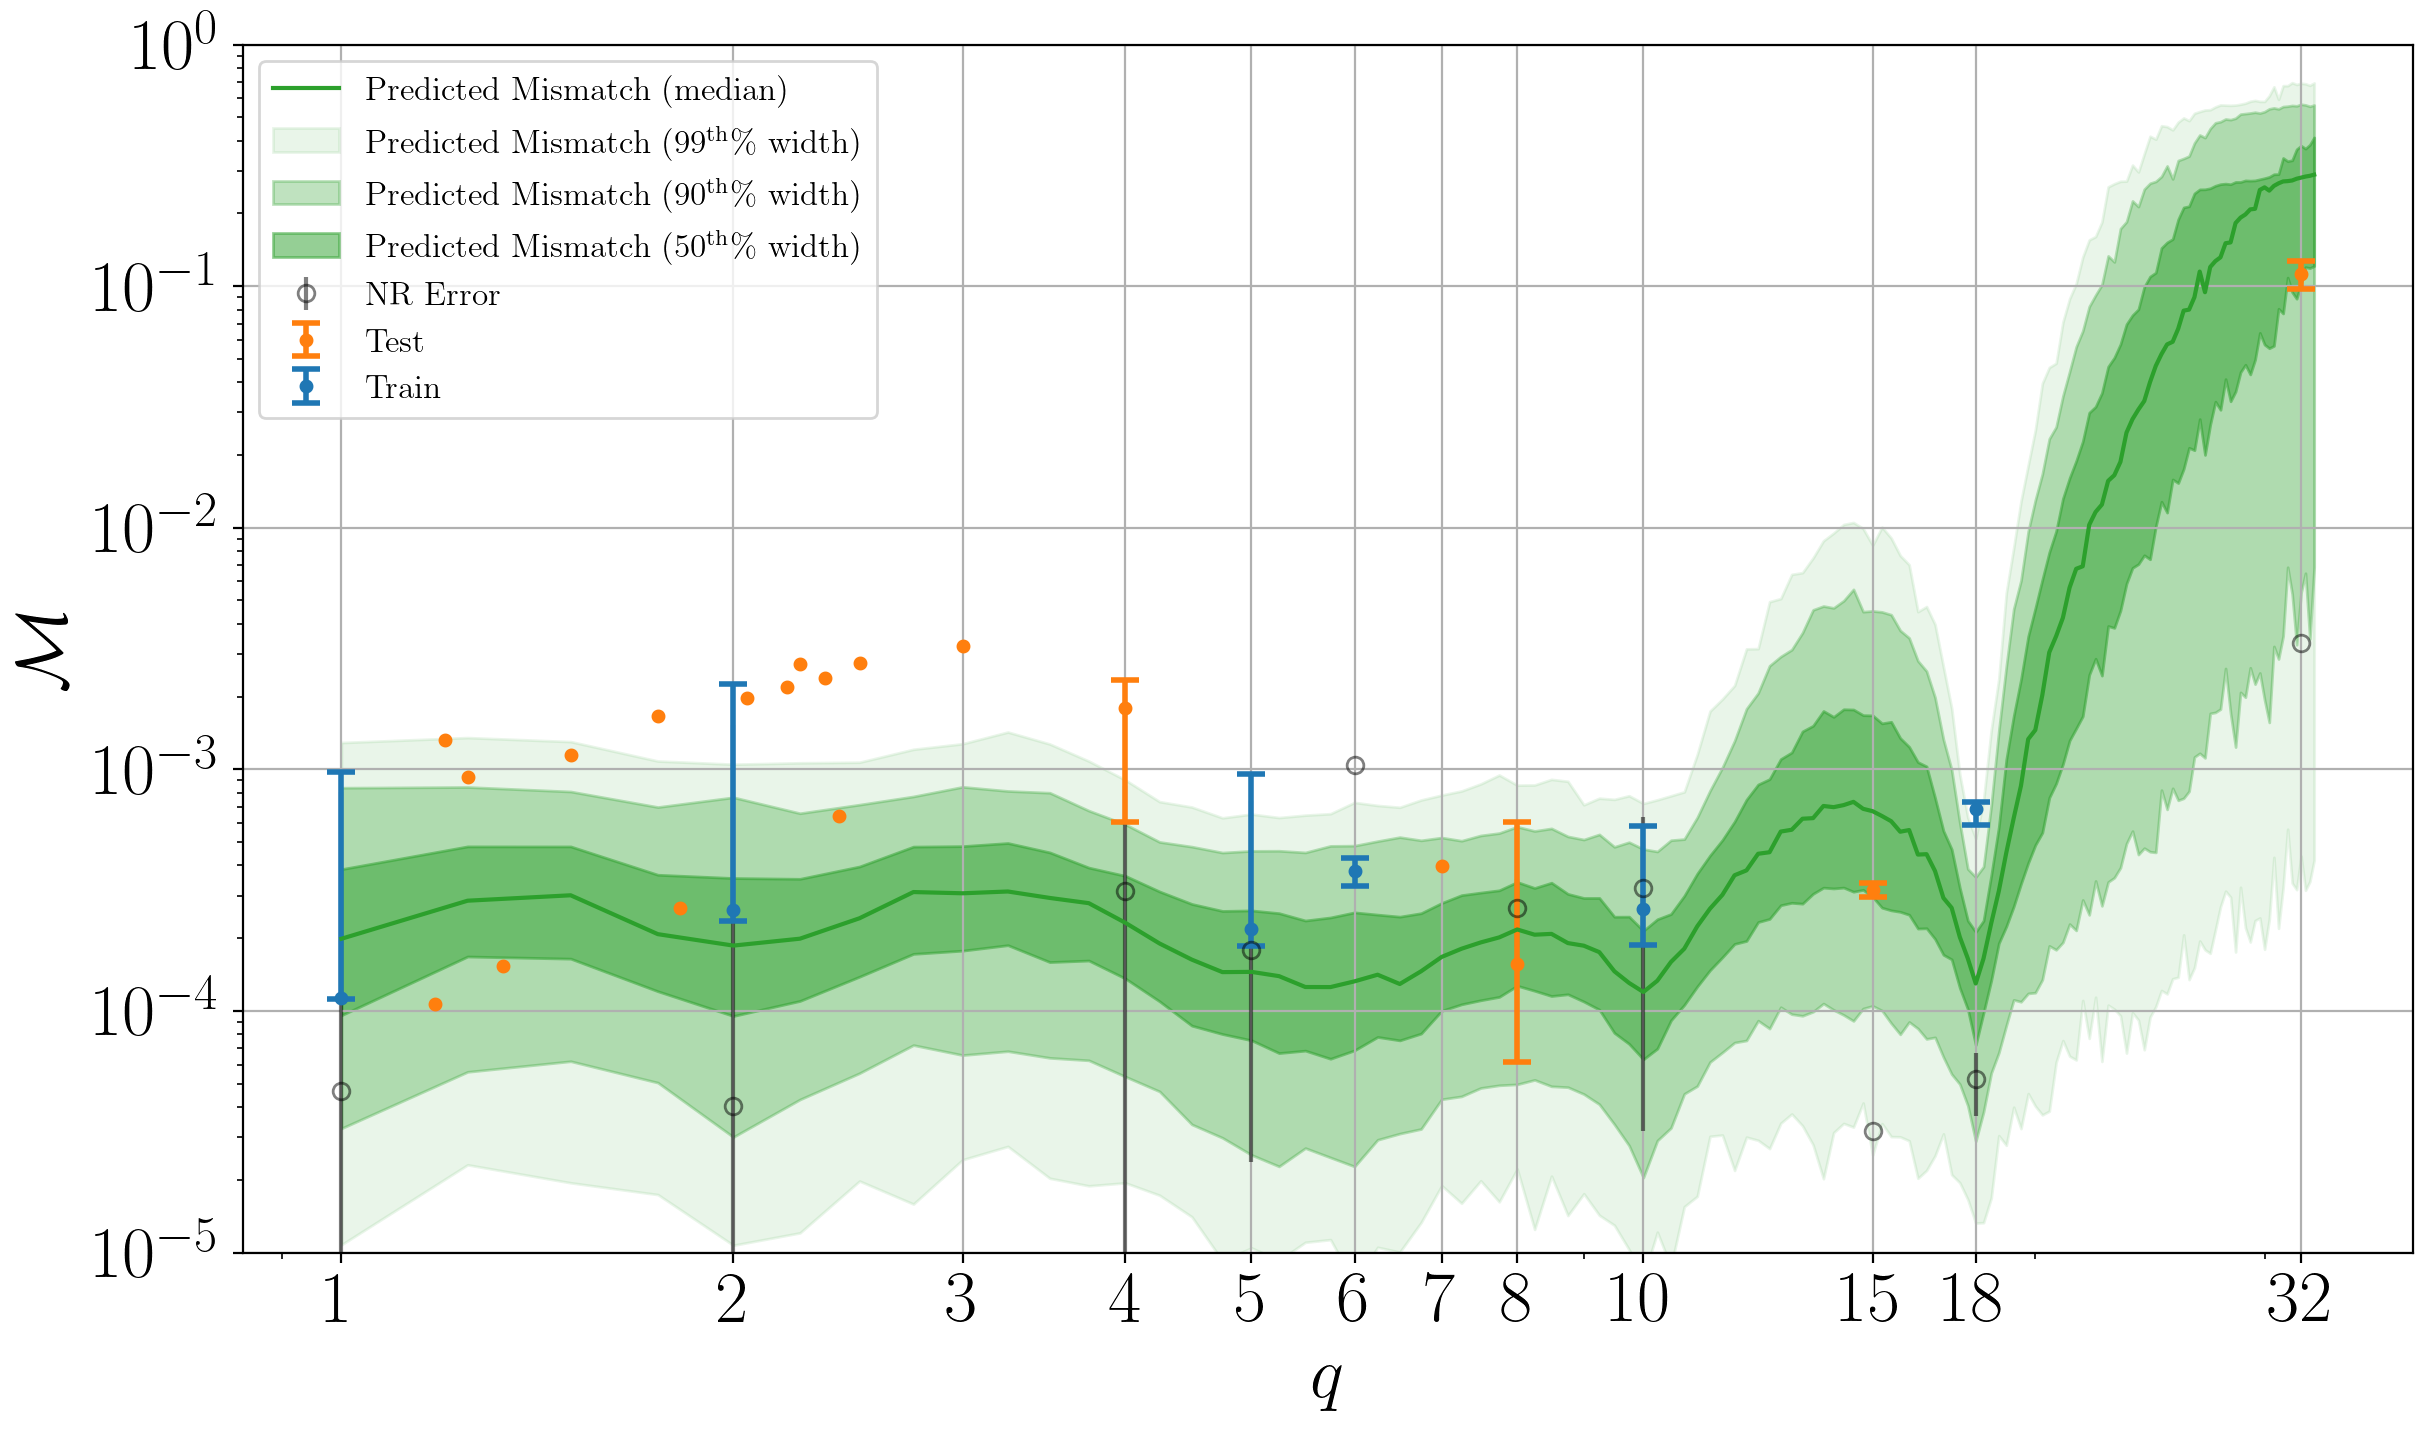

In [90]:
plt.rcParams.update({'font.size':26})
plt.figure(figsize=(14, 8), dpi=200)


plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok', label="NR Error", alpha=0.5, mfc='none')

# split up the test data because
# only some of them have error bars
mask_ = test_err_bar_data['lower'] > 0
plt.plot(test_err_bar_data[~mask_]['q'], test_err_bar_data[~mask_]['median'], 'oC1', markeredgewidth=2, markersize=3)
plt.errorbar(test_err_bar_data[mask_]['q'], test_err_bar_data[mask_]['median'], yerr=[test_err_bar_data[mask_]['lower'], test_err_bar_data[mask_]['upper']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)


####
plt.plot(qs, 1-np.percentile(matches_self, 50, 1), color='C2', ls='-', label='Predicted Mismatch (median)')
# plt.plot(qs, 1-np.percentile(matches_self, 99, 1), color='C2', ls=':', label='Predicted Mismatch (1\%)')

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.1, label=r'Predicted Mismatch ($99^{\rm{th}}\%$ width)')
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.3, label=r'Predicted Mismatch ($90^{\rm{th}}\%$ width)')
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.5, label=r'Predicted Mismatch ($50^{\rm{th}}\%$ width)')





plt.yscale('log')
plt.xscale('log')
# plt.title("Mismatch between NR and GPM Mean")
plt.legend(loc='upper left', ncol=1, fontsize=12)
plt.xlabel(r"$q$")
plt.ylabel(r"$\mathcal{M}$")
plt.ylim(1e-5, 1e0)
# plt.grid(lw=0.5, c='k')
plt.grid()

####

###
ax1 = plt.gca()
xlabels_ = np.sort(np.concatenate((train_err_bar_data['q'], test_err_bar_data['q'][test_err_bar_data['q']>=3])))
xlabels_ = np.array(xlabels_, dtype=int)
ax1.set_xticks(xlabels_, xlabels_);

###




# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/mismatch_log.png", bbox_inches='tight')

# calibration uncertainty metric

In [91]:
# does the error estimate capture the true error?

# loss(test) = self_error(test) - true_error(test)

In [92]:
qs.shape

(128,)

In [93]:
matches_self.shape

(128, 1000)

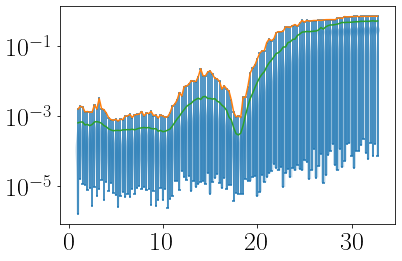

In [94]:
plt.violinplot(1-matches_self.T, qs);
plt.plot(qs, np.max(1-matches_self,1))
plt.plot(qs, np.percentile(1-matches_self,90,1))
plt.yscale('log')

In [95]:
i_self_err = IUS(qs, 1-np.min(matches_self, 1))
i_self_err_min = IUS(qs, 1-np.min(matches_self, 1))
i_self_err_median = IUS(qs, 1-np.median(matches_self, 1))
i_self_err_max = IUS(qs, 1-np.max(matches_self, 1))
i_self_err_5 = IUS(qs, np.percentile(1-matches_self, 5, 1))
i_self_err_95 = IUS(qs, np.percentile(1-matches_self, 95, 1))

In [96]:
np.min(matches_self, 1)

array([0.99841295, 0.99808378, 0.99817731, 0.99867761, 0.99864491,
       0.99870738, 0.99870384, 0.99788578, 0.99841464, 0.99678019,
       0.99837223, 0.99846008, 0.99876694, 0.99909783, 0.99920135,
       0.9992396 , 0.99918608, 0.99927695, 0.99918587, 0.99920451,
       0.99899769, 0.99899597, 0.99887061, 0.99908791, 0.99890945,
       0.99888196, 0.99885708, 0.99864424, 0.99898427, 0.99876689,
       0.99881757, 0.99862939, 0.99896035, 0.99892201, 0.99911652,
       0.99891951, 0.99899279, 0.99907354, 0.99904244, 0.99877193,
       0.99808587, 0.99781515, 0.99714309, 0.99529184, 0.99625793,
       0.99299142, 0.99274484, 0.9918522 , 0.9896641 , 0.99012598,
       0.99022435, 0.98663171, 0.97720977, 0.98571274, 0.9858617 ,
       0.98183328, 0.98038738, 0.98403254, 0.98788636, 0.98837649,
       0.99013409, 0.99406464, 0.99263296, 0.99393776, 0.99476031,
       0.99711613, 0.99870035, 0.99905102, 0.99898029, 0.99908514,
       0.99646918, 0.99657383, 0.99308044, 0.98293649, 0.97653

In [97]:
train_err_bar_data.shape

(6, 6)

In [98]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000112  0.000113  0.000972  0.000001  0.000859
1   2.0  0.000235  0.000262  0.002249  0.000027  0.001986
2   5.0  0.000186  0.000218  0.000953  0.000031  0.000735
3   6.0  0.000328  0.000379  0.000429  0.000050  0.000050
4  10.0  0.000188  0.000265  0.000582  0.000077  0.000317
5  18.0  0.000590  0.000685  0.000734  0.000095  0.000049

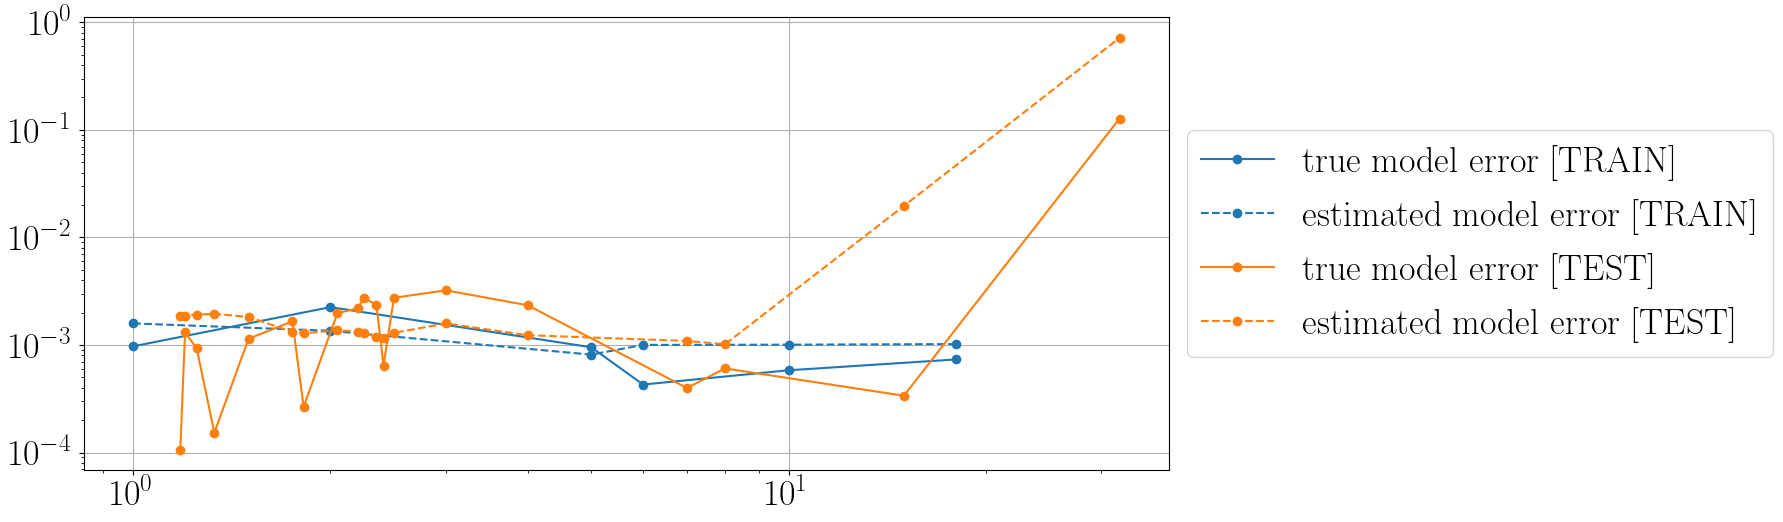

In [99]:
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(train_err_bar_data['q'], train_err_bar_data['max'], 'o-C0', label='true model error [TRAIN]')
plt.plot(train_err_bar_data['q'], i_self_err(train_err_bar_data['q']), 'o--C0', label='estimated model error [TRAIN]')

plt.plot(test_err_bar_data['q'], test_err_bar_data['max'], 'o-C1', label='true model error [TEST]')
plt.plot(test_err_bar_data['q'], i_self_err(test_err_bar_data['q']), 'o--C1', label='estimated model error [TEST]')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.yscale('log')
plt.xscale('log')
plt.grid()

In [100]:
# if i say the error is 10 and the true error is 1 then i am greatly over-estimating the error and am therefore being under-confident

# true/est < 1


# if i say the error is 1 and the true error is 10 then i am greatly under-estimating the error and am therefore being over-confident

# true/est > 1


In [101]:
# mismatch under-confidence if < 1 ?
# mismatch over-confidence if > 1
train_err_bar_data['max']/i_self_err(train_err_bar_data['q'])

0    0.612481
1    1.659485
2    1.170529
3    0.427957
4    0.577886
5    0.719724
Name: max, dtype: float64

In [102]:
train_err_bar_data['min']/i_self_err(train_err_bar_data['q'])

0    0.070471
1    0.173459
2    0.228870
3    0.327403
4    0.186426
5    0.578277
Name: min, dtype: float64

In [103]:
train_err_bar_data['median']/i_self_err(train_err_bar_data['q'])

0    0.071195
1    0.193552
2    0.267294
3    0.377680
4    0.263211
5    0.671313
Name: median, dtype: float64

In [104]:
# mismatch under-confidence if < 1 ?
# mismatch over-confidence if > 1
test_err_bar_data['max']/i_self_err(test_err_bar_data['q'])

0     0.057424
1     0.702746
2     0.484238
3     0.078624
4     0.627317
5     1.253889
6     0.207642
7     1.443740
8     1.639404
9     2.103765
10    2.000185
11    0.551286
12    2.119431
13    2.033592
14    1.898177
15    0.365058
16    0.596713
17    0.017210
18    0.177954
Name: max, dtype: float64

In [105]:
test_err_bar_data['median']

0     0.000106
1     0.001316
2     0.000928
3     0.000153
4     0.001143
5     0.001658
6     0.000266
7     0.001979
8     0.002188
9     0.002719
10    0.002377
11    0.000644
12    0.002747
13    0.003224
14    0.001794
15    0.000398
16    0.000157
17    0.000317
18    0.112380
Name: median, dtype: float64

In [106]:
i_self_err(test_err_bar_data['q'])

array([0.00185165, 0.00187303, 0.00191622, 0.00194899, 0.00182269,
       0.00132239, 0.00128294, 0.00137058, 0.00133484, 0.00129262,
       0.00118826, 0.00116774, 0.00129616, 0.00158536, 0.00123306,
       0.00109055, 0.00101573, 0.01961262, 0.7158445 ])

In [107]:
# v=train_err_bar_data['median']/i_self_err(train_err_bar_data['q'])
v=train_err_bar_data['median']/i_self_err_median(train_err_bar_data['q'])
l=train_err_bar_data['min']/i_self_err_median(train_err_bar_data['q'])
u=train_err_bar_data['max']/i_self_err_median(train_err_bar_data['q'])

median_min=train_err_bar_data['median']/i_self_err_min(train_err_bar_data['q'])
median_median=train_err_bar_data['median']/i_self_err_median(train_err_bar_data['q'])
median_max=train_err_bar_data['median']/i_self_err_max(train_err_bar_data['q'])
median_5=train_err_bar_data['median']/i_self_err_5(train_err_bar_data['q'])
median_95=train_err_bar_data['median']/i_self_err_95(train_err_bar_data['q'])

# compute error bars based on median NR and distribution of predicted mismatch
v2=train_err_bar_data['median']/i_self_err_median(train_err_bar_data['q'])
l2=train_err_bar_data['median']/i_self_err_95(train_err_bar_data['q'])
u2=train_err_bar_data['median']/i_self_err_5(train_err_bar_data['q'])



df_cal_data_train = pd.DataFrame({'q':train_err_bar_data['q'], 'y':v,  'lower':v-l, 'upper':u-v, 'median_min':median_min, 'median_median':median_median, 'median_max':median_max, 'median_5':median_5, 'median_95':median_95, 'y2':v2,  'lower2':v2-l2, 'upper2':u2-v2})




In [108]:
# v=test_err_bar_data['median']/i_self_err(test_err_bar_data['q'])
v=test_err_bar_data['median']/i_self_err_median(test_err_bar_data['q'])
l=test_err_bar_data['min']/i_self_err_median(test_err_bar_data['q'])
u=test_err_bar_data['max']/i_self_err_median(test_err_bar_data['q'])

median_min=test_err_bar_data['median']/i_self_err_min(test_err_bar_data['q'])
median_median=test_err_bar_data['median']/i_self_err_median(test_err_bar_data['q'])
median_max=test_err_bar_data['median']/i_self_err_max(test_err_bar_data['q'])
median_5=test_err_bar_data['median']/i_self_err_5(test_err_bar_data['q'])
median_95=test_err_bar_data['median']/i_self_err_95(test_err_bar_data['q'])



v2=test_err_bar_data['median']/i_self_err_median(test_err_bar_data['q'])
l2=test_err_bar_data['median']/i_self_err_95(test_err_bar_data['q'])
u2=test_err_bar_data['median']/i_self_err_5(test_err_bar_data['q'])


df_cal_data_test = pd.DataFrame({'q':test_err_bar_data['q'], 'y':v,  'lower':v-l, 'upper':u-v, 'median_min':median_min, 'median_median':median_median, 'median_max':median_max, 'median_5':median_5, 'median_95':median_95, 'y2':v2,  'lower2':v2-l2, 'upper2':u2-v2})




In [109]:
df_cal_data_train

q         y     lower      upper  median_min  median_median  median_max  \
0   1.0  0.568057  0.005778   4.318827    0.071195       0.568057   70.505968   
1   2.0  1.407243  0.146090  10.658212    0.193552       1.407243   33.736685   
2   5.0  1.499525  0.215560   5.067165    0.267294       1.499525   40.311023   
3   6.0  2.855438  0.380118   0.380118    0.377680       2.855438   76.744603   
4  10.0  2.213721  0.645798   2.646561    0.263211       2.213721   67.583435   
5  18.0  5.271848  0.730611   0.380177    0.671313       5.271848  111.821520   

    median_5  median_95        y2    lower2     upper2  
0   3.460525   0.134648  0.568057  0.433409   2.892468  
1   8.721333   0.342396  1.407243  1.064846   7.314090  
2   8.578694   0.473307  1.499525  1.026218   7.079169  
3  16.669188   0.783522  2.855438  2.071916  13.813750  
4  12.973871   0.567231  2.213721  1.646490  10.760150  
5  23.707630   1.910771  5.271848  3.361076  18.435783

In [110]:
df_cal_data_test

q          y     lower     upper  median_min  median_median  \
0    1.18   0.402731  0.000000  0.000000    0.057424       0.402731   
1    1.20   4.862428  0.000000  0.000000    0.702746       4.862428   
2    1.25   3.245662  0.000000  0.000000    0.484238       3.245662   
3    1.33   0.504319  0.000000  0.000000    0.078624       0.504319   
4    1.50   3.798147  0.000000  0.000000    0.627317       3.798147   
5    1.75   7.977555  0.000000  0.000000    1.253889       7.977555   
6    1.82   1.381747  0.000000  0.000000    0.207642       1.381747   
7    2.05  10.539792  0.000000  0.000000    1.443740      10.539792   
8    2.20  11.220447  0.000000  0.000000    1.639404      11.220447   
9    2.25  13.660896  0.000000  0.000000    2.103765      13.660896   
10   2.35  11.280186  0.000000  0.000000    2.000185      11.280186   
11   2.41   2.915359  0.000000  0.000000    0.551286       2.915359   
12   2.50  11.358437  0.000000  0.000000    2.119431      11.358437   
13   3.00  10.507923  0.000000  0.000000    2.033592      10.507923   
14   4.00   7.743243  5.142089  2.356948    1.455224       7.743243   
15   7.00   2.379523  0.000000  0.000000    0.365058       2.379523   
16   8.00   0.722610  0.438659  2.065758    0.154639       0.722610   
17  15.00   0.473132  0.029988  0.029988    0.016185       0.473132   
18  32.00   0.399819  0.053394  0.053394    0.156989       0.399819   

     median_max   median_5  median_95         y2    lower2     upper2  
0      7.163015   2.073761   0.126587   0.402731  0.276144   1.671030  
1     86.384838  24.950168   1.564249   4.862428  3.298179  20.087740  
2     59.600332  16.579589   1.098315   3.245662  2.147347  13.333926  
3     10.434766   2.568274   0.181079   0.504319  0.323240   2.063955  
4    101.303992  18.468722   1.412714   3.798147  2.385432  14.670575  
5    152.424594  32.842050   2.375933   7.977555  5.601622  24.864495  
6     26.536319   6.115812   0.374238   1.381747  1.007509   4.734065  
7    249.184809  65.062675   2.622723  10.539792  7.917070  54.522883  
8    244.322916  55.361802   3.238528  11.220447  7.981919  44.141355  
9    318.459666  63.235706   4.133051  13.660896  9.527846  49.574809  
10   408.066958  49.561668   3.589952  11.280186  7.690235  38.281482  
11   162.448143  12.760173   0.945208   2.915359  1.970151   9.844814  
12  1011.731341  49.722839   3.846558  11.358437  7.511879  38.364401  
13   634.963139  49.120717   3.809690  10.507923  6.698234  38.612794  
14   141.412479  33.545181   3.030159   7.743243  4.713083  25.801939  
15    65.484448   9.239375   0.762797   2.379523  1.616726   6.859852  
16    16.361698   3.162810   0.271408   0.722610  0.451202   2.440199  
17    52.171103   3.025261   0.070153   0.473132  0.402978   2.552129  
18   643.239514  20.898909   0.198595   0.399819  0.201224  20.499090

In [111]:
1/df_cal_data_train['y']

0    1.760388
1    0.710610
2    0.666878
3    0.350209
4    0.451728
5    0.189687
Name: y, dtype: float64

In [112]:
1/df_cal_data_test['y']

0     2.483048
1     0.205659
2     0.308104
3     1.982873
4     0.263286
5     0.125352
6     0.723721
7     0.094879
8     0.089123
9     0.073202
10    0.088651
11    0.343011
12    0.088040
13    0.095166
14    0.129145
15    0.420252
16    1.383872
17    2.113576
18    2.501130
Name: y, dtype: float64

In [113]:
###
#
# output data to make plots
#
###


# train set
# plt.errorbar(df_cal_data_train['q'], df_cal_data_train['y2'], yerr=[df_cal_data_train['lower2'], df_cal_data_train['upper2']], fmt='oC0', label='train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
df_plot_cal_train = pd.DataFrame({'x':df_cal_data_train['q'], 'y':df_cal_data_train['y2'], 'yerr_low':df_cal_data_train['lower2'], 'yerr_high':df_cal_data_train['upper2']})

# test set
# plt.errorbar(df_cal_data_test['q'], df_cal_data_test['y2'], yerr=[df_cal_data_test['lower2'], df_cal_data_test['upper2']], fmt='oC1', label='test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
df_plot_cal_test = pd.DataFrame({'x':df_cal_data_test['q'], 'y':df_cal_data_test['y2'], 'yerr_low':df_cal_data_test['lower2'], 'yerr_high':df_cal_data_test['upper2']})


# xlabels
# xlabels_ = np.sort(np.concatenate((df_cal_data_train['q'], df_cal_data_test['q'][df_cal_data_test['q']>=3])))
# xlabels_ = np.array(xlabels_, dtype=int)
df_plot_cal_xlabels = pd.DataFrame({'x':xlabels_})



df_plot_cal_train.to_csv("/Users/sebastian.khan/Desktop/df_plot_cal_train.csv", index=False)
df_plot_cal_test.to_csv("/Users/sebastian.khan/Desktop/df_plot_cal_test.csv", index=False)
df_plot_cal_xlabels.to_csv("/Users/sebastian.khan/Desktop/df_plot_cal_xlabels.csv", index=False)

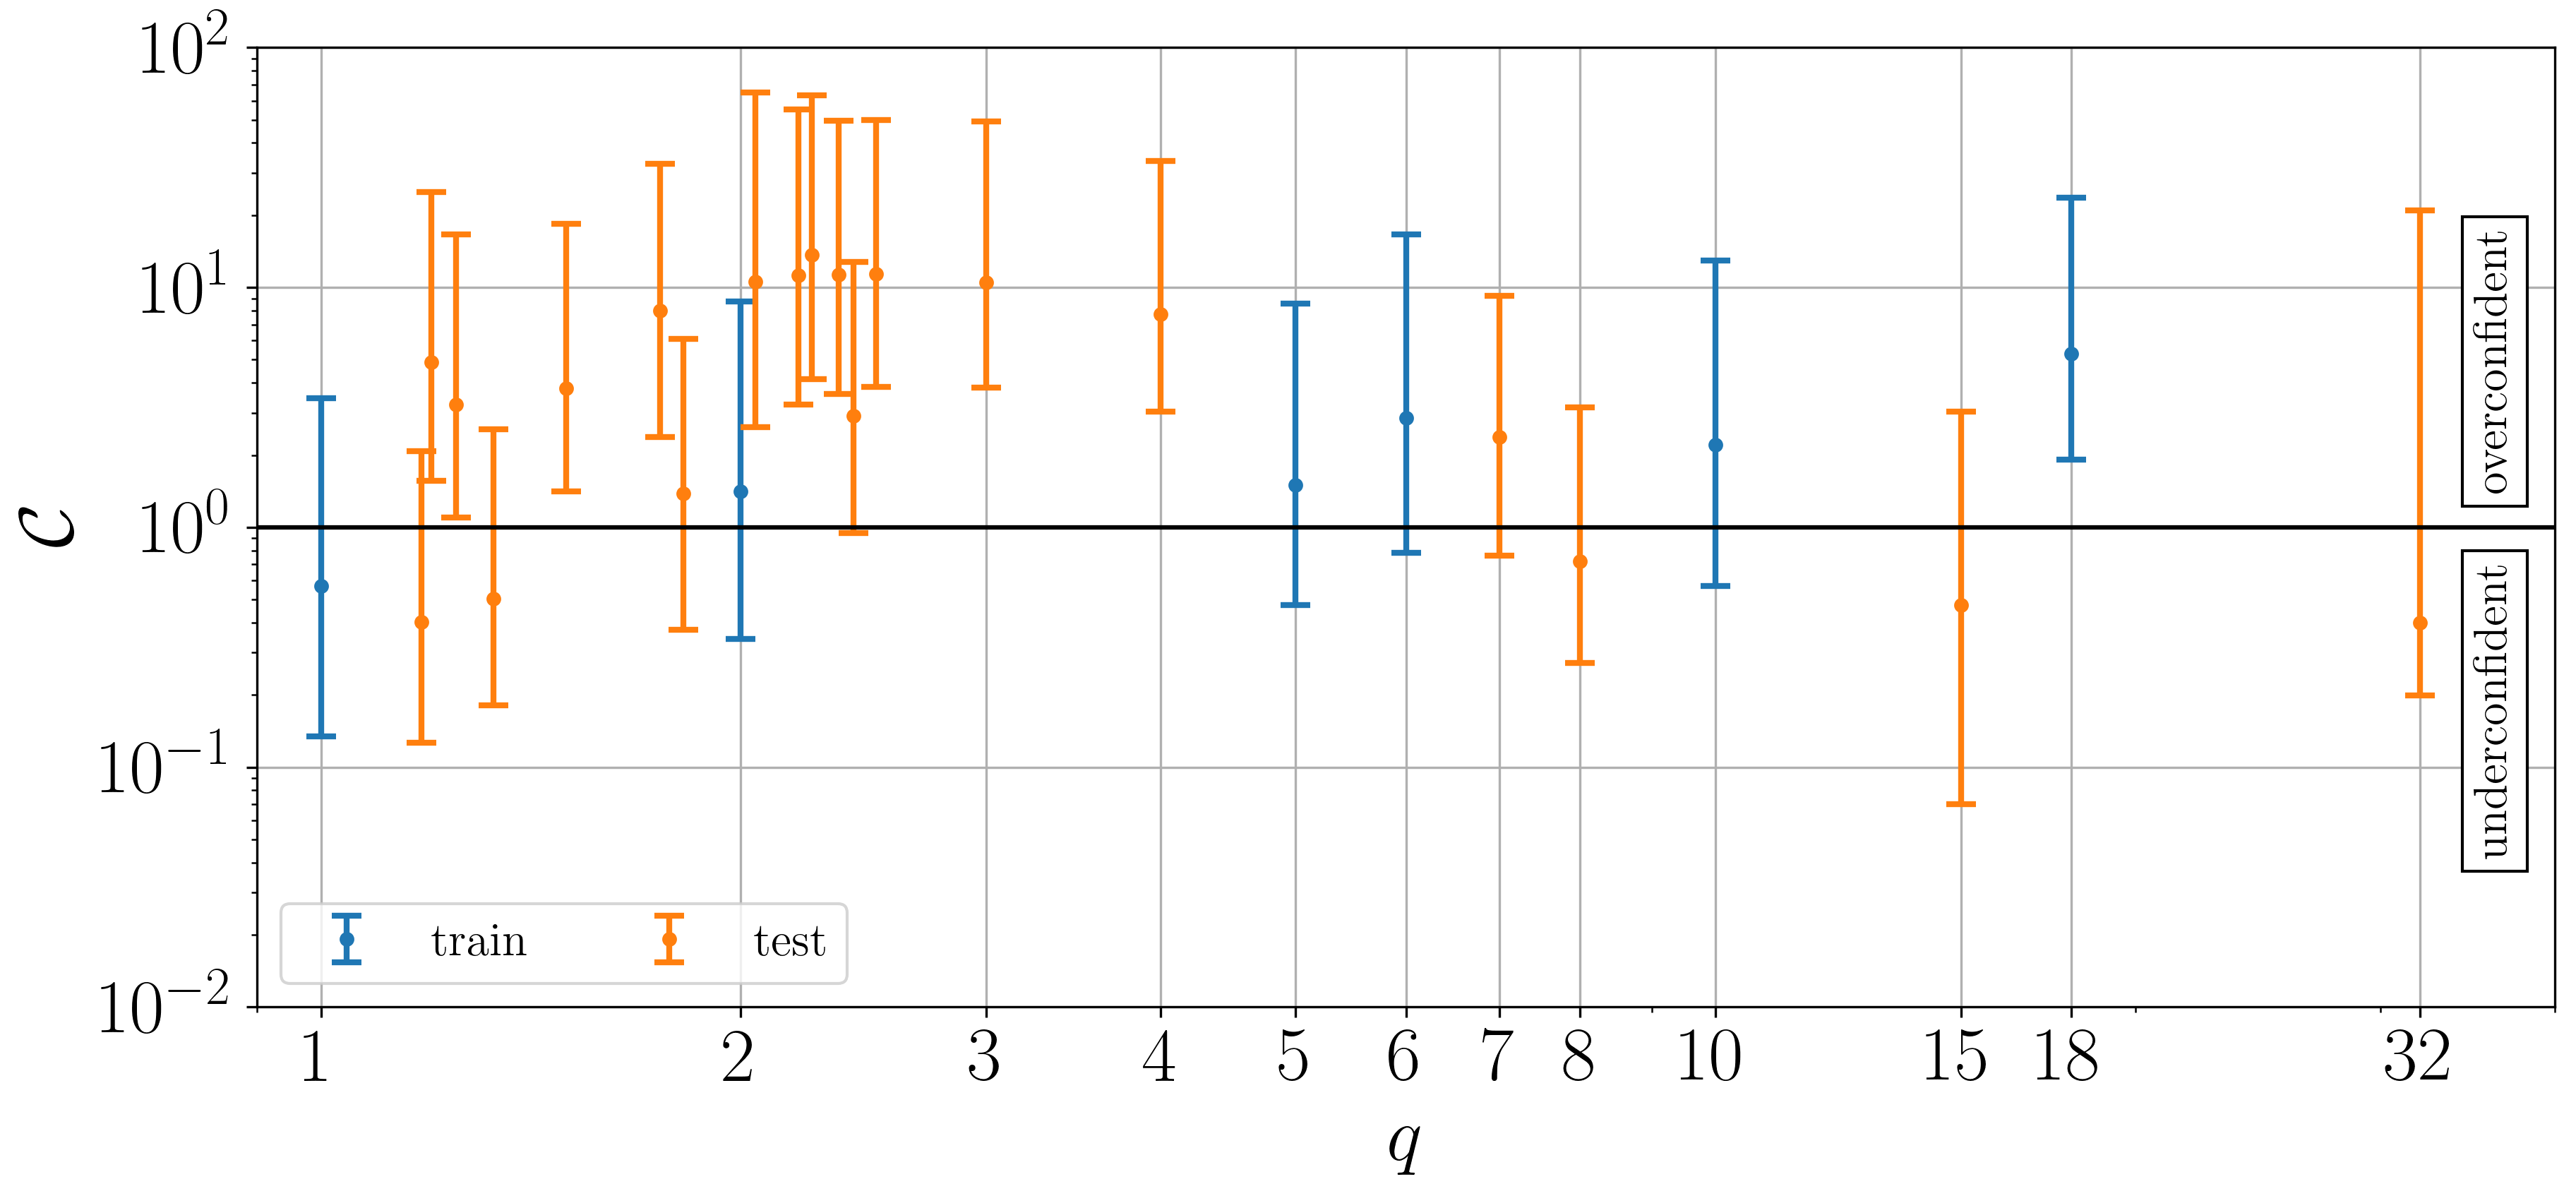

In [114]:
# plt.rcParams.update({'font.size':34})
plt.figure(figsize=(14, 6), dpi=300)
# plt.errorbar(df_cal_data_train['q'], df_cal_data_train['y'], yerr=[df_cal_data_train['lower'], df_cal_data_train['upper']], fmt='xC2', capsize=20, elinewidth=3, markeredgewidth=3)
# plt.errorbar(df_cal_data_test['q'], df_cal_data_test['y'], yerr=[df_cal_data_test['lower'], df_cal_data_test['upper']], fmt='xC2', capsize=20, elinewidth=1, markeredgewidth=2)

plt.errorbar(df_cal_data_train['q'], df_cal_data_train['y2'], yerr=[df_cal_data_train['lower2'], df_cal_data_train['upper2']], fmt='oC0', label='train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
plt.errorbar(df_cal_data_test['q'], df_cal_data_test['y2'], yerr=[df_cal_data_test['lower2'], df_cal_data_test['upper2']], fmt='oC1', label='test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.axhline(1, c='k')


# plt.plot(df_cal_data_train['q'], df_cal_data_train['y2'])
# plt.fill_between(df_cal_data_train['q'], y1=df_cal_data_train['y2']-df_cal_data_train['lower2'], y2=df_cal_data_train['upper2']+df_cal_data_train['y2'], alpha=0.5)

# plt.plot(df_cal_data_test['q'], df_cal_data_test['y2'], '-')
# plt.fill_between(df_cal_data_test['q'], y1=df_cal_data_test['y2']-df_cal_data_test['lower2'], y2=df_cal_data_test['upper2']+df_cal_data_test['y2'], alpha=0.5)




plt.xscale('log')
plt.yscale('log')
plt.ylabel(r"$\mathcal{C}$")
plt.xlabel(r"$q$")
# plt.title("Model Calibration")
plt.text(37.5, 1.5, 'overconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)
plt.text(37.5, 0.045, 'underconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)

plt.xlim(9e-1, 40)
plt.ylim(1e-2, 1e2)

# plt.annotate("", xy=(31, 2.), xycoords='data', xytext=(31, 1.3), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
# plt.annotate("", xy=(31, 0.2), xycoords='data', xytext=(31, 0.8), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.legend(loc='lower left', fontsize=16, ncol=2)
plt.grid()


ax1 = plt.gca()
# ax1.set_yticks([0.1,1,10], [-1,0,1], fontsize=14)
# ax1.set_xticks([1, 10], [1, 10])
# ax2 = ax1.secondary_xaxis('top')

xlabels_ = np.sort(np.concatenate((df_cal_data_train['q'], df_cal_data_test['q'][df_cal_data_test['q']>=3])))
xlabels_ = np.array(xlabels_, dtype=int)
ax1.set_xticks(xlabels_, xlabels_);


# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/calibration_plot.png", bbox_inches='tight')

In [115]:
matplotlib.rcParams['font.family']


['STIXGeneral']

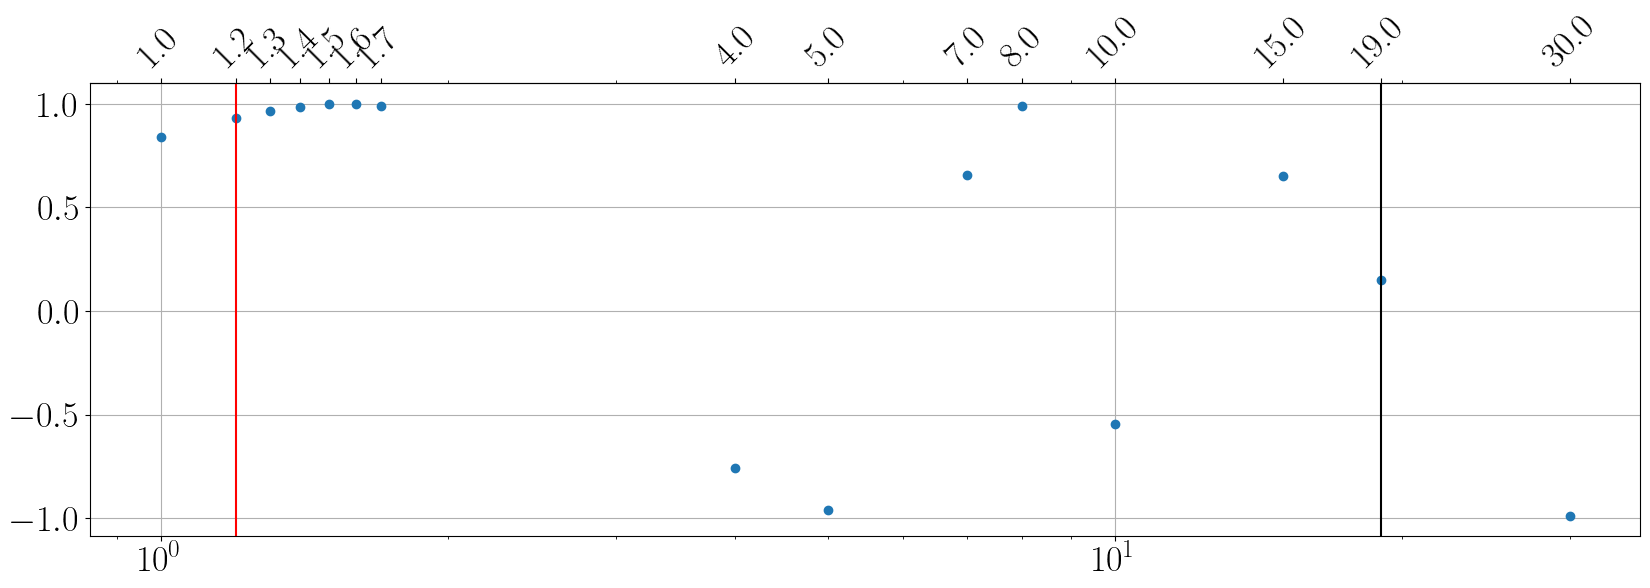

In [116]:
import matplotlib
import matplotlib.ticker


fig, ax1 = plt.subplots(figsize=(20,6), dpi=100)
xx__ = np.array([1,1.2,1.3,1.4,1.5,1.6,1.7,4,5,7,8,10,15,19,30])
yy__ = np.sin(xx__)
ax1.plot(xx__, yy__, 'o')

ax1.grid(True)
ax1.axvline(1.2, c='r')
ax1.axvline(19, c='k')
ax1.set_xscale('log')
# ax1.set_xticks([1,8, 10, 30])


# fmt = matplotlib.ticker.StrMethodFormatter("{x}")
# ax1.xaxis.set_major_formatter(fmt)
# ax1.yaxis.set_major_formatter(fmt)


ax2 = ax1.secondary_xaxis('top')
ax2.set_xticks(xx__, xx__, rotation=45);
# , fontsize=14
# , family='Helvetica'




# ax2 = ax1.secondary_xaxis('top')
# # ax2.tick_params(axis='x', color='red')
# # ax2.set_xticks([1.2,19]);
# ax2.set_xticks([1,1.2,3],[1,1.2,3])
# # ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))



In [117]:
# under-confident: samples from GPM are more varied
# over-confident: samples from GPM are less varied

In [118]:
# confidence score: ratio between True error estiamte and self-error estimate

# plots for paper

## comparing q = 4, 8, 15, 32

In [119]:
plt.rcParams.update({'font.size':16})

In [120]:
def get_data_for_plot(q, n_samples=100, distance=1e4, add_nr_nr_comparison=False):
    idxs = nr_data['df'].query(f"q == {q}").index
    print(f"q = {q}")

    times_ = nr_data['times']
    nr_strain_0 = nr_data['strains'][idxs[0]]
    nr_strain_other = nr_data['strains'][idxs[1:]]
    delta_t = 1/4096.
    Mtotal = 100
    t_nr_start = -800
    
    # high_frequency_cutoff = 40
    high_frequency_cutoff = None

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
        distance=distance,
    )

    hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=n_samples,
        distance=distance,
    )

    hp_nr, hc_nr = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_0,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
        distance=distance,
    )


    # compare the mean model prediction with one of the NR waveforms
    matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr, high_frequency_cutoff=high_frequency_cutoff)

    # compare samples from the model with one of the NR waveforms
    matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr, high_frequency_cutoff=high_frequency_cutoff)
    
    
    if add_nr_nr_comparison == True:
        hp_nr_others = []
        hc_nr_others = []
        for i in range(len(idxs[1:])):
            hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
                q=q,
                strain=nr_strain_other[i],
                times=times_,
                M=Mtotal,
                delta_t=delta_t,
                t_nr_start=t_nr_start,
                distance=distance,
            )
            hp_nr_others.append(hp_nr_other_)
            hc_nr_others.append(hc_nr_other_)

        # compare a reference NR with the other NR simulations at the same mass-ratio:

        matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr, high_frequency_cutoff=high_frequency_cutoff)
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s, hp1s_nr_nr, hc1s_nr_nr

    else:
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s

In [121]:
q4_data = {}
q4_data['hp1s_bar'], q4_data['hc1s_bar'], q4_data['hp2'], q4_data['hc2'], q4_data['hp1s'], q4_data['hc1s'] = get_data_for_plot(q=4, n_samples=n_samples)

q = 4


In [122]:
q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'] = get_data_for_plot(q=8, n_samples=n_samples)

q = 8


In [123]:
q15_data = {}
q15_data['hp1s_bar'], q15_data['hc1s_bar'], q15_data['hp2'], q15_data['hc2'], q15_data['hp1s'], q15_data['hc1s'] = get_data_for_plot(q=15, n_samples=n_samples)

q = 15


In [124]:
q32_data = {}
q32_data['hp1s_bar'], q32_data['hc1s_bar'], q32_data['hp2'], q32_data['hc2'], q32_data['hp1s'], q32_data['hc1s'] = get_data_for_plot(q=32, n_samples=n_samples)

q = 32


In [125]:
times_M.shape

(1757,)

In [126]:
t_ = phenom.StoM(q4_data['hp1s_bar'][0].sample_times, 100)

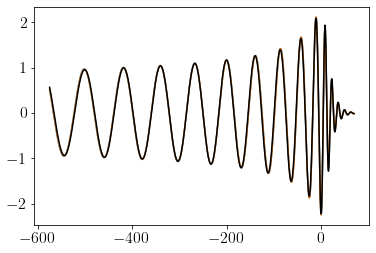

In [127]:
plt.plot(t_, q4_data['hp1s_bar'][0])
plt.plot(t_, q4_data['hp1s'][0])

plt.plot(t_, q4_data['hp2'], c='k')

In [128]:
phenom.StoM(q15_data['hp1s_bar'][0].sample_times, 100).shape

(1303,)

(-100.0, 100.0)

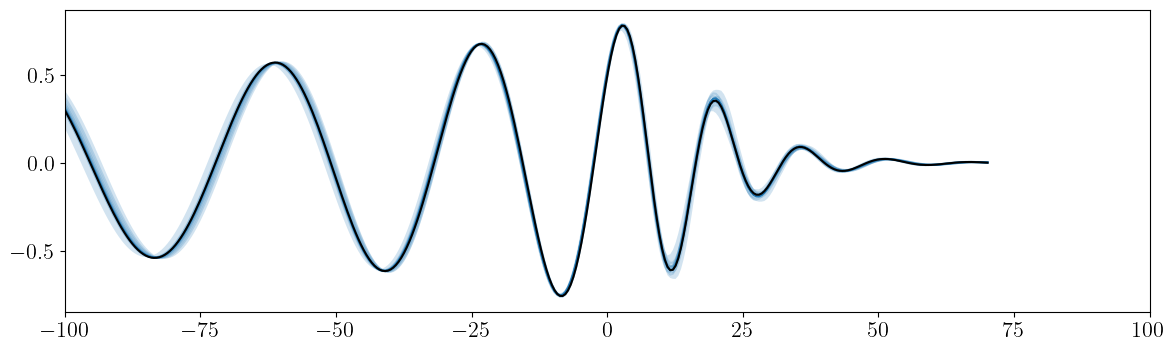

In [129]:
v_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])

plt.figure(figsize=(14,4), dpi=100)
plt.plot(t_, q15_data['hp1s_bar'][0])

plt.plot(t_, v_samples[0], color='C0', alpha=0.2)
plt.plot(t_, v_samples[1:10].T, color='C0', alpha=0.2)

plt.fill_between(t_, y1=v_samples.min(0), y2=v_samples.max(0), alpha=0.2)
plt.plot(t_, q15_data['hp2'], c='k')

plt.xlim(-100,100)

In [130]:
v4_samples = np.array([q4_data['hp1s'][i].numpy() for i in range(n_samples)])
v8_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])
v15_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])
v32_samples = np.array([q32_data['hp1s'][i].numpy() for i in range(n_samples)])

In [131]:




# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

In [132]:
# alpha_l=0.5
# alpha=0.3





# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

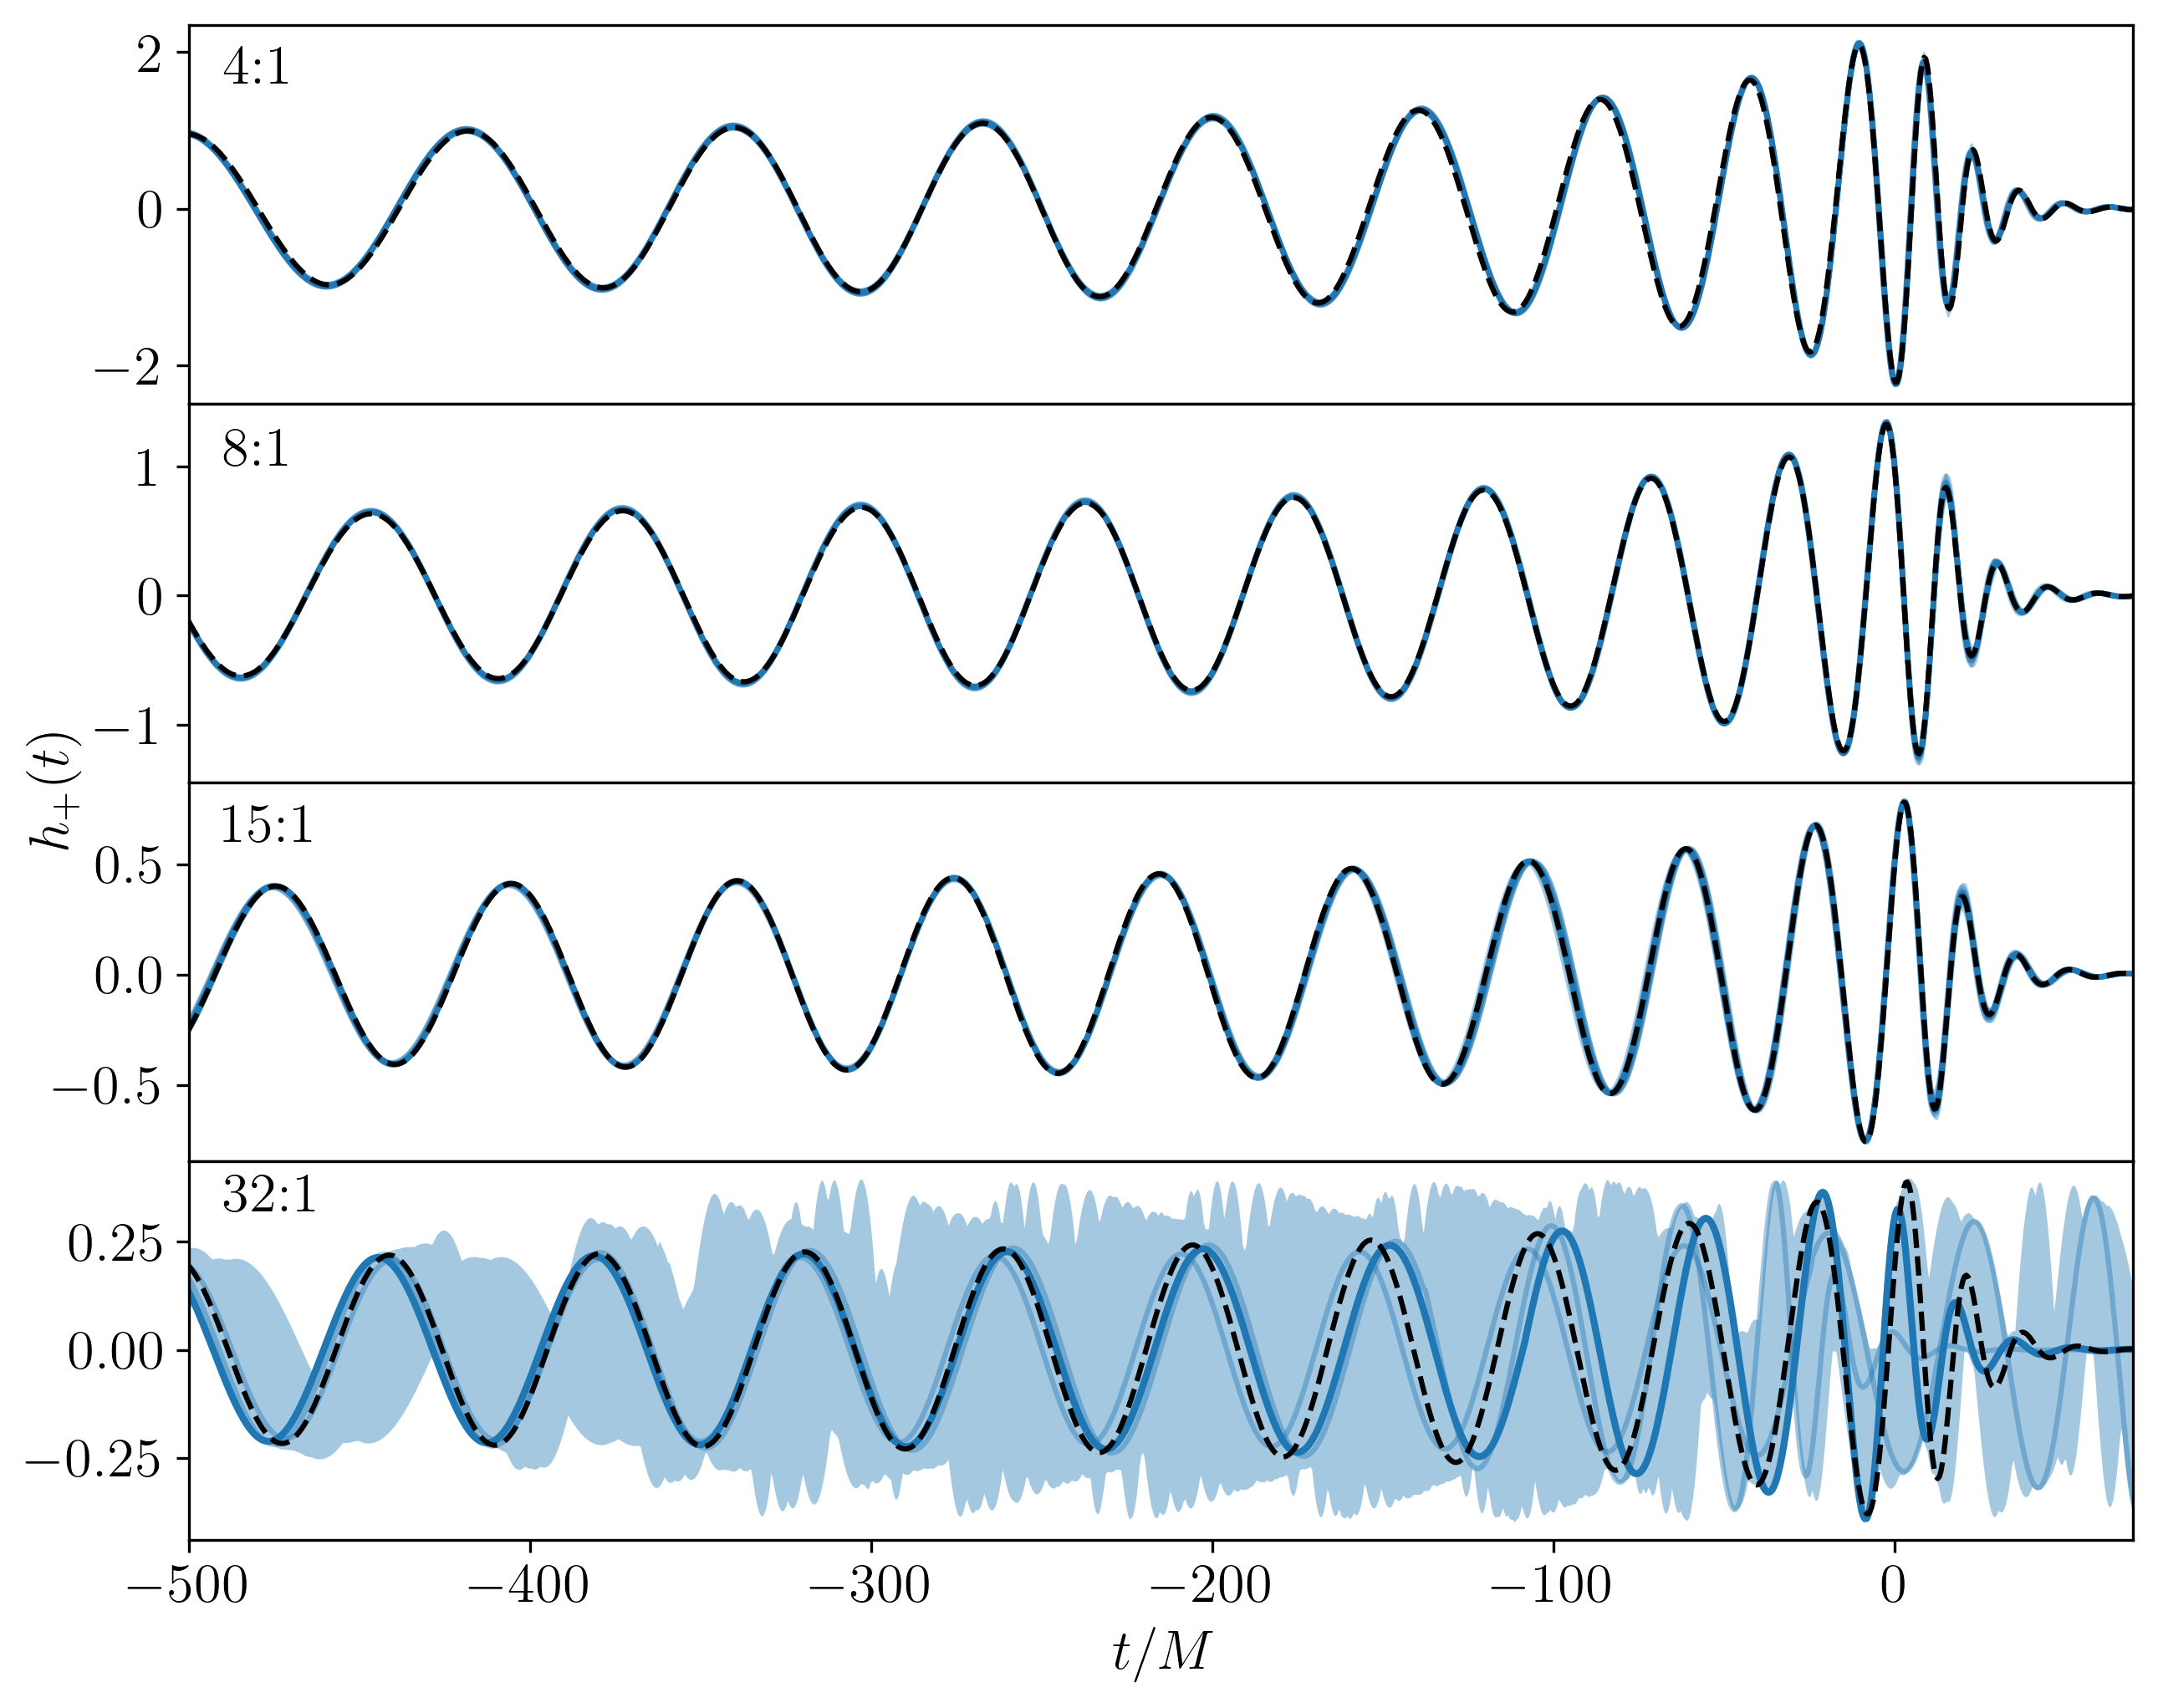

In [133]:
alpha=0.4
alpha_l=0.4
xlims=[-500, 70]
# xlims=[-100, 70]
fig=plt.figure(figsize=(10,8), dpi=300)
plt.subplots_adjust(hspace=(0))
plt.subplot(4, 1, 1)


plt.plot(t_, q4_data['hp1s_bar'][0])
plt.plot(t_, v4_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v4_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
plt.plot(t_, q4_data['hp2'], c='k', ls='--', label='q4')
plt.text(-490, 1.6, "4:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 2)
plt.plot(t_, q8_data['hp1s_bar'][0])
plt.plot(t_, v8_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v8_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
plt.plot(t_, q8_data['hp2'], c='k', ls='--', label='q8')
plt.text(-490, 1, "8:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 3)
plt.plot(t_, q15_data['hp1s_bar'][0])
plt.plot(t_, v15_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v15_samples[1:10].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
plt.plot(t_, q15_data['hp2'], c='k', ls='--', label='q15')
plt.text(-490, 0.6, "15:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 4)
plt.plot(t_, q32_data['hp1s_bar'][0], lw=2)
plt.plot(t_, v32_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v32_samples[1:2].T, color='C0', alpha=alpha_l)
plt.fill_between(t_, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
plt.plot(t_, q32_data['hp2'], c='k', ls='--', label='q32')
plt.text(-490, 0.32, "32:1")
plt.xlim(*xlims)
# plt.legend(loc='upper left', fontsize=10)
plt.xlabel("$t/M$")
fig.text(0.06, 0.5, r'$h_+(t)$', va='center', rotation='vertical')

# fig.supylabel()
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png")

plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_plot.png")

In [134]:
# alpha=0.4
# alpha_l=0.4
# xlims=[-100, 70]
# plt.figure(figsize=(6,8), dpi=300)
# plt.subplots_adjust(hspace=(0))
# plt.subplot(4, 1, 1)
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
# plt.plot(times_M, q4_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 2)
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
# plt.plot(times_M, q8_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 3)
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 4)
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)

# opening plot

In [135]:
nr_data['df'].query(f"q == 4")

name    q    fring     fdamp  duration  t_final  \
1        q4a0_T_96_384  4.0  0.07433  0.014004    2202.1    229.5   
5        q4a0_T_80_320  4.0  0.07433  0.014004    2199.5    689.1   
9       q4a0_T_112_448  4.0  0.07433  0.014004    2202.5    151.8   
11   SXS_BBH_0167_Res5  4.0  0.07433  0.014004    3115.7    404.1   
14   SXS_BBH_0167_Res3  4.0  0.07433  0.014004    2874.0    403.8   
28  RIT-eBBH-1133-n100  4.0  0.07433  0.014004    2143.1    712.8   
44              GT0454  4.0  0.07433  0.014004    1855.1    495.1   

    start_freq_100Msun   set  has_dup                      tag  
1            21.017192  test     True       q4.0_q4a0_T_96_384  
5            20.716335  test     True       q4.0_q4a0_T_80_320  
9            20.892015  test     True      q4.0_q4a0_T_112_448  
11           20.834667  test     True   q4.0_SXS_BBH_0167_Res5  
14           20.826849  test     True   q4.0_SXS_BBH_0167_Res3  
28           20.749856  test     True  q4.0_RIT-eBBH-1133-n100  
44           20.814909  test     True              q4.0_GT0454

In [136]:
nr_data['df'].query(f"q == 10")

name     q     fring     fdamp  duration  t_final  \
4   q10c25e_T_112_448  10.0  0.066184  0.014119    1157.7    121.6   
19  SXS_BBH_0303_Res3  10.0  0.066184  0.014119    3397.6    498.9   
21  SXS_BBH_0303_Res4  10.0  0.066184  0.014119    3433.2    499.1   
23  SXS_BBH_0303_Res5  10.0  0.066184  0.014119    3461.4    499.7   
38  RIT-BBH-0978-n144  10.0  0.066184  0.014119    1963.0    393.4   

    start_freq_100Msun    set  has_dup                      tag  
4            24.089458  train     True  q10.0_q10c25e_T_112_448  
19           24.051628  train     True  q10.0_SXS_BBH_0303_Res3  
21           23.964726  train     True  q10.0_SXS_BBH_0303_Res4  
23           23.954080  train     True  q10.0_SXS_BBH_0303_Res5  
38           23.965060  train     True  q10.0_RIT-BBH-0978-n144

In [137]:
# q8_data = {}
# q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=4, n_samples=n_samples, add_nr_nr_comparison=True)


q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=8, n_samples=n_samples, add_nr_nr_comparison=True)


# q8_data = {}
# q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=15, n_samples=n_samples, add_nr_nr_comparison=True)



q = 8


In [138]:
m_bar = analysis_utils.compute_match(q8_data['hp1s_bar'][0], q8_data['hp2'], f_low=25)

In [139]:
m_samples = np.array([analysis_utils.compute_match(q8_data['hp1s'][i], q8_data['hp2'], f_low=25) for i in range(len(q8_data['hp1s']))])

In [140]:
m_bar

0.9998428315137523

In [141]:
m_5 = np.percentile(m_samples, 5)
m_5

0.9993622552777716

In [142]:
m_95 = np.percentile(m_samples, 95)
m_95

0.9999308461358293

In [143]:
m_lower = m_bar-m_5
m_lower

0.0004805762359807453

In [144]:
m_bar - m_lower

0.9993622552777716

In [145]:
m_upper = m_95-m_bar
m_upper

8.801462207697064e-05

In [146]:
m_bar + m_upper

0.9999308461358293

In [147]:
print(rf"$M = {m_bar:.3f}_{m_5:.3f}^{m_95:.3f}$")

$M = 1.000_0.999^1.000$


In [148]:
h_bar = q8_data['hp1s_bar'][0].numpy()

h_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])

h_nr = q8_data['hp2'].numpy()

h_nr_other = np.array([q8_data['hp1s_nr_nr'][i].numpy() for i in range(len(q8_data['hc1s_nr_nr']))])

In [149]:
t_ = phenom.StoM(q8_data['hp1s_bar'][0].sample_times, 100)

In [150]:
plt.figure(figsize=(14, 4), dpi=100)
plt.plot(t_, h_bar, lw=5, c='k')
plt.plot(t_, h_nr_other.T, ls='-', c='k', alpha=0.5, lw=5)
plt.plot(t_, h_nr, color='deepskyblue')
plt.plot(t_, h_samples[0], color='deepskyblue')
plt.plot(t_, h_samples[1:3].T, color='deepskyblue')
plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='deepskyblue', alpha=0.8);


plt.xlim(-100, 70)

plt.title(rf"$M = {{{m_bar:.5f}}}_{{{m_5:.5f}}}^{{{m_95:.5f}}}$")

Text(0.5, 1.0, '$M = {0.99984}_{0.99936}^{0.99993}$')

In [151]:
phi_bar = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_bar'][0], q8_data['hc1s_bar'][0])

phi_samples = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s'][i], q8_data['hc1s'][i]) for i in range(n_samples)]
phi_samples = np.array([phi_samples[i].numpy() for i in range(n_samples)])

phi_nr = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp2'], q8_data['hc2'])

phi_nr_other = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_nr_nr'][i], q8_data['hc1s_nr_nr'][i]) for i in range(len(q8_data['hc1s_nr_nr']))]
phi_nr_other = np.array([phi_nr_other[i].numpy() for i in range(len(phi_nr_other))])

In [152]:
phi_diff_nr_bar = phi_nr-phi_bar
phi_diff_nr_samples = (phi_nr.numpy()-phi_samples)
phi_diff_nr_nr = (phi_nr.numpy()-phi_nr_other)

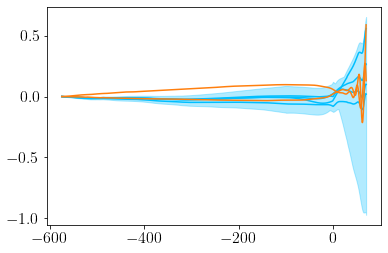

In [153]:
plt.figure()

plt.plot(t_, phi_diff_nr_bar, color='deepskyblue')
plt.plot(t_, phi_diff_nr_samples[0], color='deepskyblue')
plt.plot(t_, phi_diff_nr_samples[1:3].T, color='deepskyblue')
plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='deepskyblue', alpha=0.3);
plt.plot(t_, phi_diff_nr_nr.T, c='C1')

# plt.xlim(-100, 100)

In [157]:
# fig = plt.figure(figsize=(6,4), dpi=200)
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
gs = GridSpec(3, 1, figure=fig, wspace=0.0, hspace=0.)
ax0 = fig.add_subplot(gs[:2, 0])
plt.plot(t_, h_nr, lw=1, color='k', label='NR')
# plt.plot(t_, h_nr_other.T, lw=1, color='k', alpha=0.5)
plt.plot(t_, h_bar, c='C1', ls='--', lw=1, label='Model')
# plt.plot(times_M, h_samples[0], color='deepskyblue',  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color='deepskyblue',  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='C1', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(h_samples, 5, 0), y2=np.percentile(h_samples, 95, 0), color='C1', alpha=0.3);

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.1);
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($90^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.3);
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($50^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(h_samples, p1, 0), y2=np.percentile(h_samples, p2, 0), color='C1', alpha=0.5);


plt.legend(ncol=2, loc='lower left')


plt.xlim(-570, 70)
# plt.xlim(-100, 70)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

plt.text(-560, 1.2, rf"$Match = {{{m_bar:.5f}}}_{{\,\,{m_5:.5f}}}^{{\,\,{m_95:.5f}}}$");

ax1 = fig.add_subplot(gs[2:, 0])
plt.plot(t_, phi_diff_nr_nr.T, c='k')
plt.plot(t_, phi_diff_nr_bar, color='C1', lw=1, ls='--')
# plt.plot(t_, phi_diff_nr_samples[0], color='C1', alpha=0.7, ls='-')
# plt.plot(t_, phi_diff_nr_samples[3:5].T, color='C1', alpha=0.7, ls='-')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='C1', alpha=0.4);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 5, 0), y2=np.percentile(phi_diff_nr_samples, 95, 0), color='C1', alpha=0.4);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 1, 0), y2=np.percentile(phi_diff_nr_samples, 99, 0), color='C1', alpha=0.4);

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($99^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color='C1', alpha=0.1);
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($90^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color='C1', alpha=0.3);
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
# ($50^{\rm{th}}\%$ width)
plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, p1, 0), y2=np.percentile(phi_diff_nr_samples, p2, 0), color='C1', alpha=0.5);



plt.xlim(-570, 70)
# plt.xlim(-100, 70)
# plt.ylim(-0.59,0.52)
# plt.ylim(-0.59,0.52)
plt.ylabel(r'$\Delta \phi (t)$')
# plt.grid()
fig.supxlabel("$t/M$")




# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png")

plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")

99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0
99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0


Text(0.5, 0.01, '$t/M$')

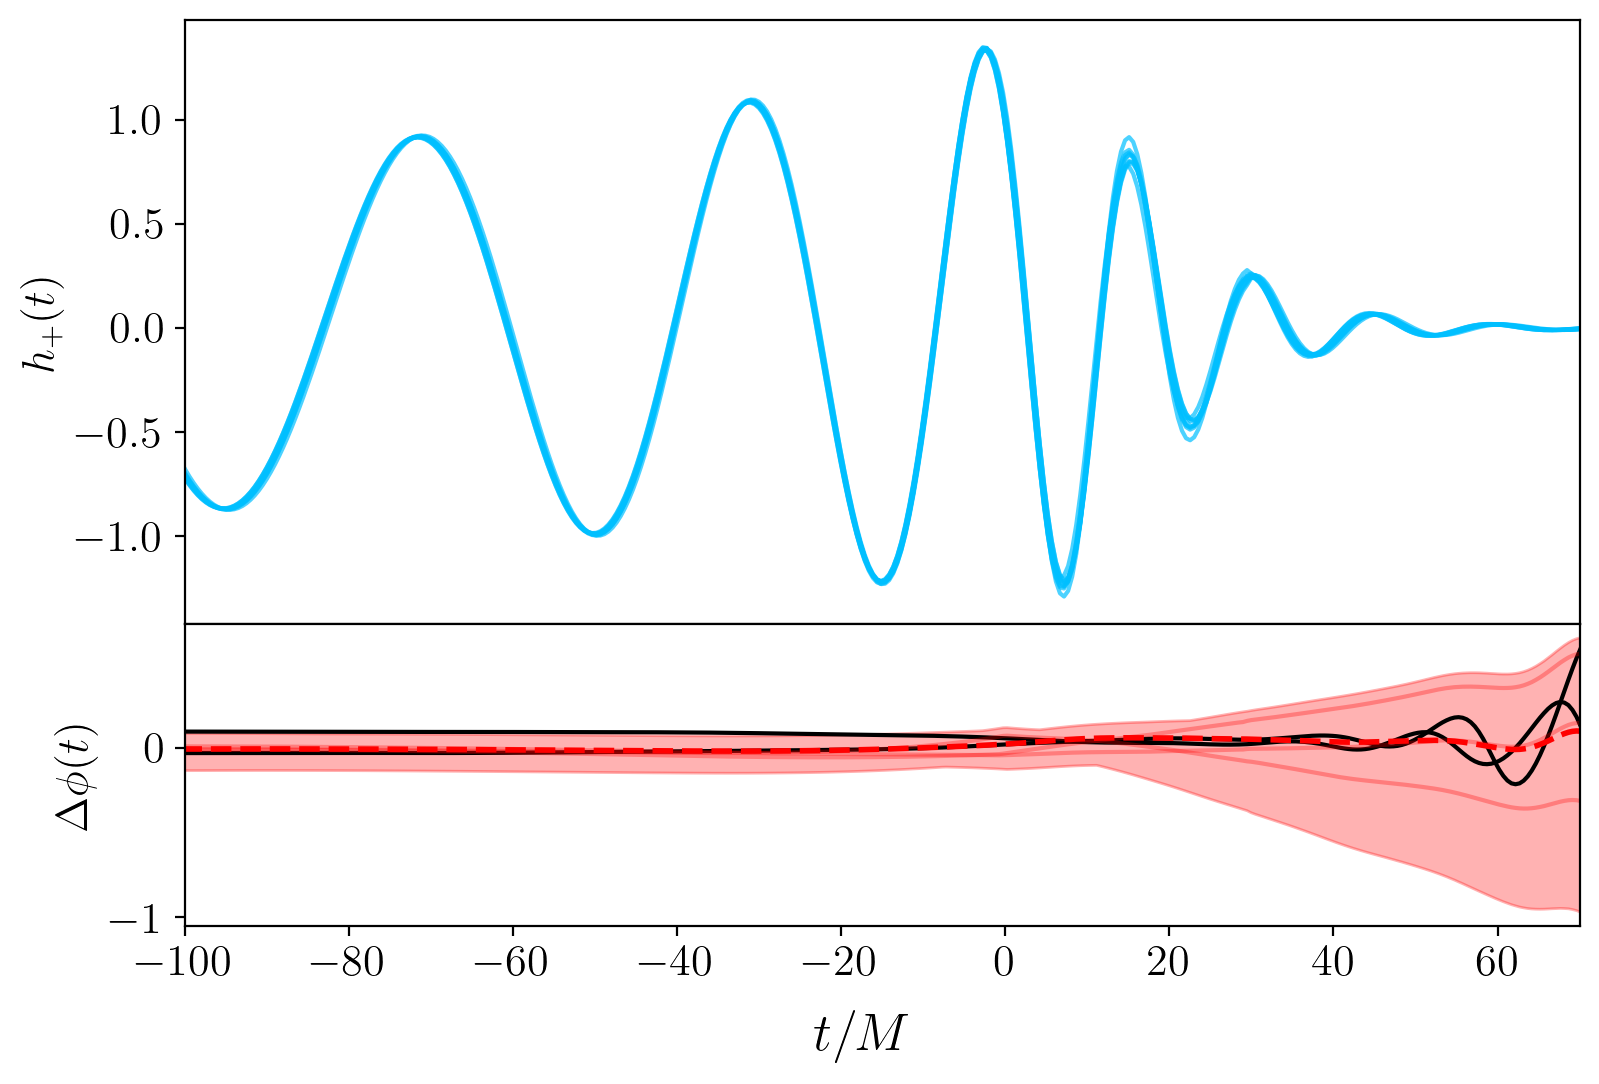

In [155]:
# fig = plt.figure(figsize=(6,4), dpi=200)
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
gs = GridSpec(3, 1, figure=fig, wspace=0.0, hspace=0.)
ax0 = fig.add_subplot(gs[:2, 0])
# plt.plot(t_, h_nr, lw=2, color='k')
# plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c='r', ls='--', lw=1)
# plt.plot(times_M, h_samples[0], color='deepskyblue',  alpha=0.3, ls='--')
plt.plot(t_, h_samples[1:10].T, color='deepskyblue',  alpha=0.7, ls='-')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='r', alpha=0.3);
# plt.xlim(-570, 70)
plt.xlim(-100, 70)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

# plt.text(-560, 1.2, rf"$Match = {{{m_bar:.5f}}}_{{\,\,{m_5:.5f}}}^{{\,\,{m_95:.5f}}}$");

ax1 = fig.add_subplot(gs[2:, 0])
plt.plot(t_, phi_diff_nr_nr.T, c='k')
plt.plot(t_, phi_diff_nr_bar, color='r', lw=2, ls='--')
plt.plot(t_, phi_diff_nr_samples[0], color='r', alpha=0.3, ls='-')
plt.plot(t_, phi_diff_nr_samples[3:5].T, color='r', alpha=0.3, ls='-')
plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='r', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 5, 0), y2=np.percentile(phi_diff_nr_samples, 95, 0), color='r', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 1, 0), y2=np.percentile(phi_diff_nr_samples, 99, 0), color='r', alpha=0.4);


# plt.xlim(-570, 70)
plt.xlim(-100, 70)
# plt.ylim(-0.59,0.52)
# plt.ylim(-0.59,0.52)
plt.ylabel(r'$\Delta \phi (t)$')
# plt.grid()
fig.supxlabel("$t/M$")




In [156]:
# col='deepskyblue'
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
# gs = GridSpec(3, 3, figure=fig, wspace=0.0, hspace=0.)
# ax0 = fig.add_subplot(gs[:2, :2])
# plt.plot(t_, h_nr, lw=2, color='k')
# # plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c=col, ls='--', lw=1)
# plt.plot(t_, h_samples[0], color=col,  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
# # plt.xlim(-600, -10)
# plt.xticks([])
# plt.ylabel(r'$h_+(t)$')

# ax1 = fig.add_subplot(gs[2:, :2])
# plt.plot(t_, phi_diff_nr_nr.T, c='k')
# plt.plot(t_, phi_diff_nr_bar, color=col, ls='--', lw=1)
# plt.plot(t_, phi_diff_nr_samples[0], color=col, alpha=0.5, ls='--')
# plt.plot(t_, phi_diff_nr_samples[1:3].T, color=col, alpha=0.5, ls='--')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);

# plt.ylabel(r'$\Delta \phi (t)$')
# # plt.xlim(-600, -10)
# plt.ylim(-0.5,0.5)

# ax2 = fig.add_subplot(gs[:2, 2:])
# plt.plot(t_, h_nr, lw=2, color='k')
# # plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c=col, ls='--', lw=1)
# plt.plot(t_, h_samples[0], color=col,  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
# plt.xlim(-10, 70)
# plt.xticks([])
# plt.yticks([])

# ax3 = fig.add_subplot(gs[2:, 2:])
# plt.plot(t_, phi_diff_nr_nr.T, c='k')
# plt.plot(t_, phi_diff_nr_bar, color=col, ls='--')
# plt.plot(t_, phi_diff_nr_samples[0], color=col, alpha=0.3, ls='--')
# plt.plot(t_, phi_diff_nr_samples[1:3].T, color=col, alpha=0.3, ls='--')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);
# plt.yticks([])
# plt.xlim(-10, 70)
# plt.ylim(-0.5,0.5)

# fig.supxlabel("$t/M$")
# # plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")